## Libraries

In [ ]:
import tensorflow as tf
print(tf.test.is_built_with_cuda())
print(tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None))


D:\Anaconda\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:544: FutureWarning: Passing (type, 1) or '1type' 

True
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True


In [ ]:
'''importing the libraries'''

from tensorflow.keras.models import Sequential
import os 
from keras.layers import LeakyReLU
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasClassifier
%matplotlib inline
from tqdm.notebook import tqdm, trange
# Importing libraries
from keras.layers import Dropout, BatchNormalization
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import opendatasets as od
import tarfile
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve,roc_auc_score
import pandas as pd
from PIL import Image
#from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import imblearn
import numpy as np
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
import scikitplot as skplt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB, BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn import linear_model
from tqdm import tqdm, trange
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, VotingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE

In [ ]:
df = pd.read_csv('dataset.csv', low_memory = False)

#df

## Data Pre-Processing

In [ ]:
df.dtypes

TempSNO                             int64
gender_id                           int64
patient_age                         int64
city_id                            object
Ethicity_language                  object
date_of_admission                  object
date_of_surgery                    object
date_of_discharge                  object
Admission_to_surgery                int64
LOS_Surgery_to_discharge            int64
BMI                                object
Active_tobacco_use                  int64
f_history_cad                       int64
diabetes                            int64
last_hematocrit                   float64
Dyslipidemia                       object
last_cretenine_preop              float64
dialysis                            int64
hypertension                        int64
BPsystolic                         object
Cerebovascular_disease              int64
Carotid_disease                     int64
chronic_lung_disease                int64
FirstCVSurgery                    

In [ ]:
# dropping columns 
df0 = df.drop(columns = ['TempSNO', 'city_id', 'Ethicity_language','specify_other', 'mortality_date'])
df0 = df0.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
df0.dtypes

gender_id                           int64
patient_age                         int64
date_of_admission                  object
date_of_surgery                    object
date_of_discharge                  object
Admission_to_surgery                int64
LOS_Surgery_to_discharge            int64
BMI                                object
Active_tobacco_use                  int64
f_history_cad                       int64
diabetes                            int64
last_hematocrit                   float64
Dyslipidemia                       object
last_cretenine_preop              float64
dialysis                            int64
hypertension                        int64
BPsystolic                         object
Cerebovascular_disease              int64
Carotid_disease                     int64
chronic_lung_disease                int64
FirstCVSurgery                      int64
previous_cv_interventions           int64
previous_coronary_bypass            int64
previous_valve                    

In [ ]:
df0 = df0.drop(columns = ['date_of_admission', 'date_of_surgery','date_of_discharge','or_entry_date', 'or_entry_time','or_exit_date', 'or_exit_time', 'intubation_time', 'extubation_time','skin_incision_start_date','skin_incision_start_time','skin_incision_closure_date','skin_incision_closure_time' ])

In [ ]:
# Checking columns for missing values
col_list = []
for i in range(df0.shape[1]):
# count number of rows with missing values
    n_miss = df0.iloc[:,i].isnull().sum()
    if n_miss > 0:
        col_list.append(i)
    perc = n_miss / df0.shape[0] * 100
    print("{0}: Missing Values: {1}, ({2})".format(i, n_miss, perc))

0: Missing Values: 0, (0.0)
1: Missing Values: 0, (0.0)
2: Missing Values: 0, (0.0)
3: Missing Values: 0, (0.0)
4: Missing Values: 22, (0.41021816147678536)
5: Missing Values: 0, (0.0)
6: Missing Values: 0, (0.0)
7: Missing Values: 0, (0.0)
8: Missing Values: 0, (0.0)
9: Missing Values: 11, (0.20510908073839268)
10: Missing Values: 0, (0.0)
11: Missing Values: 0, (0.0)
12: Missing Values: 0, (0.0)
13: Missing Values: 26, (0.4848032817452918)
14: Missing Values: 0, (0.0)
15: Missing Values: 0, (0.0)
16: Missing Values: 0, (0.0)
17: Missing Values: 0, (0.0)
18: Missing Values: 0, (0.0)
19: Missing Values: 0, (0.0)
20: Missing Values: 0, (0.0)
21: Missing Values: 0, (0.0)
22: Missing Values: 0, (0.0)
23: Missing Values: 0, (0.0)
24: Missing Values: 0, (0.0)
25: Missing Values: 0, (0.0)
26: Missing Values: 0, (0.0)
27: Missing Values: 0, (0.0)
28: Missing Values: 0, (0.0)
29: Missing Values: 0, (0.0)
30: Missing Values: 0, (0.0)
31: Missing Values: 0, (0.0)
32: Missing Values: 0, (0.0)
33:

In [ ]:
# names of features having NA values
x = df0.iloc[:,col_list]
x.columns

Index(['BMI', 'Dyslipidemia', 'BPsystolic', 'LM_specify', 'intubation_date',
       'extubation_date', 'CPB_utilization_plan', 'perfusion_time_min',
       'FemoralArteryandFemVein', 'AortaandAtrialCaval',
       'cannulation_method_other', 'None_F', 'AorticCrossClamp',
       'BalloonOcclusion', 'PartialCrossClamp', 'cross_clamp_time_min',
       'IABP_indication', 'red_blood_cell_units_A',
       'fresh_frozen_plasma_units_A', 'cryoprecipitate_units_A',
       'platelet_units_A', 'no_of_ima_distal', 'DirectVision',
       'distal_anastomoses', 'initial_hours_ventilated', 'initial_icu_hours',
       'initial_icu_stay', 'additional_icu_hours',
       'additional_hours_ventilated', 'drainage_at_12_hours',
       'drainage_at_24_hours', 'post_op_creatinine'],
      dtype='object')

In [ ]:
# Index of the said features
col_list

[4,
 9,
 13,
 55,
 59,
 60,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 74,
 76,
 77,
 78,
 79,
 83,
 84,
 86,
 89,
 90,
 91,
 93,
 101,
 103,
 104,
 107]

In [ ]:
# Populating BMI by using Height and Weight columns
df0['BMI'] = pd.to_numeric(df0['BMI'],errors = 'coerce')
for i in trange(df0.shape[0]):
    df0['BMI'][i] = (df0['weight'][i])/(df0['height'][i]/100)**2

  0%|          | 0/5363 [00:00<?, ?it/s]D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
100%|██████████| 5363/5363 [00:01<00:00, 3641.87it/s]


In [ ]:
# additional_icu_hours ref: readmission
df0['additional_icu_hours']= pd.to_numeric(df0['additional_icu_hours'],errors = 'coerce')
df0['additional_icu_hours'] = df0['additional_icu_hours'].fillna(0)
df0['additional_icu_hours'] = df0['additional_icu_hours'].apply(lambda x:x/24)

# additional_hours_ventilated ref: reintubated
df0['additional_hours_ventilated']= pd.to_numeric(df0['additional_hours_ventilated'],errors = 'coerce')
df0['additional_hours_ventilated'] = df0['additional_hours_ventilated'].fillna(0)
df0['additional_hours_ventilated'] = df0['additional_hours_ventilated'].apply(lambda x:x/24)


# red_blood_cells_units_A ref: intaop_blood_products
df0['red_blood_cell_units_A'] = pd.to_numeric(df0['red_blood_cell_units_A'],errors = 'coerce')
df0['red_blood_cell_units_A'] = df0['red_blood_cell_units_A'].fillna(0)

# fresh_frozen_plasma_units_A ref: intaop_blood_products
df0['fresh_frozen_plasma_units_A'] = pd.to_numeric(df0['fresh_frozen_plasma_units_A'],errors = 'coerce')
df0['fresh_frozen_plasma_units_A'] = df0['fresh_frozen_plasma_units_A'].fillna(0)

# cryoprecipitate_units_A ref: intaop_blood_products
df0['cryoprecipitate_units_A'] = pd.to_numeric(df0['cryoprecipitate_units_A'],errors = 'coerce')
df0['cryoprecipitate_units_A'] = df0['cryoprecipitate_units_A'].fillna(0)

# platelet_units_A ref: intaop_blood_products
df0['platelet_units_A'] = pd.to_numeric(df0['platelet_units_A'],errors = 'coerce')
df0['platelet_units_A'] = df0['platelet_units_A'].fillna(0)

# no_of_ima_distal ref: IMA
df0['no_of_ima_distal'] = pd.to_numeric(df0['no_of_ima_distal'],errors = 'coerce')
df0['no_of_ima_distal'] = df0['no_of_ima_distal'].fillna(0)

# DirectVision ref: IMA
df0['DirectVision'] = pd.to_numeric(df0['DirectVision'],errors = 'coerce')
df0['DirectVision'] = df0['DirectVision'].fillna(0)

# distal_anastomoses: Radial Conduit
df0['distal_anastomoses'] = pd.to_numeric(df0['distal_anastomoses'],errors = 'coerce')
df0['distal_anastomoses'] = df0['distal_anastomoses'].fillna(0)

# IABP_indication ref: IABP
df0['IABP_indication'] = pd.to_numeric(df0['IABP_indication'],errors = 'coerce')
df0['IABP_indication'] = df0['IABP_indication'].fillna(0)

# CPB_utilization_plan
df0['CPB_utilization_plan'] = pd.to_numeric(df0['CPB_utilization_plan'],errors = 'coerce')
df0['CPB_utilization_plan'] = df0['CPB_utilization_plan'].fillna(0)

# FemoralArteryandFemVein
df0['FemoralArteryandFemVein'] = pd.to_numeric(df0['FemoralArteryandFemVein'],errors = 'coerce')
df0['FemoralArteryandFemVein'] = df0['FemoralArteryandFemVein'].fillna(0)

# AortaandAtrialCaval
df0['AortaandAtrialCaval'] = pd.to_numeric(df0['AortaandAtrialCaval'],errors = 'coerce')
df0['AortaandAtrialCaval'] = df0['AortaandAtrialCaval'].fillna(0)

# cannulation_method_other
df0['cannulation_method_other'] = pd.to_numeric(df0['cannulation_method_other'],errors = 'coerce')
df0['cannulation_method_other'] = df0['cannulation_method_other'].fillna(0)

# None_F
df0['None_F'] = pd.to_numeric(df0['None_F'],errors = 'coerce')
df0['None_F'] = df0['None_F'].fillna(0)

# AorticCrossClamp
df0['AorticCrossClamp'] = pd.to_numeric(df0['AorticCrossClamp'],errors = 'coerce')
df0['AorticCrossClamp'] = df0['AorticCrossClamp'].fillna(0)

# BalloonOcclusion
df0['BalloonOcclusion'] = pd.to_numeric(df0['BalloonOcclusion'],errors = 'coerce')
df0['BalloonOcclusion'] = df0['BalloonOcclusion']

# PartialCrossClamp
df0['PartialCrossClamp'] = pd.to_numeric(df0['PartialCrossClamp'],errors = 'coerce')
df0['PartialCrossClamp'] = df0['PartialCrossClamp'].fillna(0)

# cross_clamp_time_min
df0['cross_clamp_time_min'] = pd.to_numeric(df0['cross_clamp_time_min'],errors = 'coerce')
df0['cross_clamp_time_min'] = df0['cross_clamp_time_min'].fillna(0)

# perfusion_time_min
df0['perfusion_time_min'] = pd.to_numeric(df0['perfusion_time_min'],errors = 'coerce')
df0['perfusion_time_min'] = df0['perfusion_time_min'].fillna(0)

# post_op_creatinine
df0['post_op_creatinine']= pd.to_numeric(df0['post_op_creatinine'],errors = 'coerce')
df0['post_op_creatinine'] = df0['post_op_creatinine'].interpolate(method = 'polynomial', order = 2)

# drainage_at_12_hours
df0['drainage_at_12_hours']= pd.to_numeric(df0['drainage_at_12_hours'],errors = 'coerce')
df0['drainage_at_12_hours'] = df0['drainage_at_12_hours'].interpolate(method = 'polynomial', order = 2)
df0['drainage_at_12_hours'] = df0['drainage_at_12_hours'].apply(lambda x:x/1000)

# drainage_at_24_hours
df0['drainage_at_24_hours']= pd.to_numeric(df0['drainage_at_24_hours'],errors = 'coerce')
df0['drainage_at_24_hours'] = df0['drainage_at_24_hours'].interpolate(method = 'polynomial', order = 2)
df0['drainage_at_24_hours'] = df0['drainage_at_24_hours'].apply(lambda x:x/1000)

df0.loc[df0['icu_visit'] == 0, 'initial_icu_hours'] = 0
df0.loc[df0['icu_visit'] == 0, 'initial_hours_ventilated'] = 0
df0.loc[df0['icu_visit'] == 0, 'initial_icu_stay'] = 0

# initial_hours_ventilated
df0['initial_hours_ventilated']= pd.to_numeric(df0['initial_hours_ventilated'],errors = 'coerce')
df0['initial_hours_ventilated'] = df0['initial_hours_ventilated'].interpolate(method = 'polynomial', order = 2)
df0['initial_hours_ventilated'] = df0['initial_hours_ventilated'].apply(lambda x:x/24)

# initial_icu_hours
df0['initial_icu_hours']= pd.to_numeric(df0['initial_icu_hours'],errors = 'coerce')
df0['initial_icu_hours'] = df0['initial_icu_hours'].interpolate(method = 'polynomial', order = 2)


# initial_icu_stay
df0['initial_icu_stay']= pd.to_numeric(df0['initial_icu_stay'],errors = 'coerce')
df0['initial_icu_stay'] = df0['initial_icu_stay'].interpolate(method = 'polynomial', order = 2)
df0['initial_icu_stay'] = df0['initial_icu_stay'].apply(lambda x:x/24)

# BPsystolic
df0['BPsystolic'] = pd.to_numeric(df0['BPsystolic'],errors = 'coerce')
m1 = df0.loc[df0['hypertension'] == 1, 'BPsystolic'].mean()
m2 = df0.loc[df0['hypertension'] == 0, 'BPsystolic'].mean()
df0.loc[df0['hypertension'] == 1, 'BPsystolic'] = df0.loc[df0['hypertension'] == 1, 'BPsystolic'].fillna(m1)#isnull().sum()
df0.loc[df0['hypertension'] == 0, 'BPsystolic'] = df0.loc[df0['hypertension'] == 0, 'BPsystolic'].fillna(m2)#isnull().sum()

# BalloonOcclusion
df0['BalloonOcclusion'] = pd.to_numeric(df0['BalloonOcclusion'],errors = 'coerce')
df0['BalloonOcclusion'] = df0['BalloonOcclusion'].fillna(0)

# LM_specify, weight, height, initial_icu_hours
df0 = df0.drop(columns = ['LM_specify','weight','height','initial_icu_hours'])

# inubation and extubation
df0['intubation_date'] = pd.to_datetime(df0.intubation_date)
df0['extubation_date'] = pd.to_datetime(df0.extubation_date)
df0['intubation_to_extubation'] = (df0['extubation_date'] - df0['intubation_date']).dt.days

# cross_clamp_time_min
df0['cross_clamp_time_min']= pd.to_numeric(df0['cross_clamp_time_min'],errors = 'coerce')
df0['cross_clamp_time_min'] = df0['cross_clamp_time_min'].apply(lambda x:x/1440)

# perfusion_time_min
df0['perfusion_time_min']= pd.to_numeric(df0['perfusion_time_min'],errors = 'coerce')
df0['perfusion_time_min'] = df0['perfusion_time_min'].apply(lambda x:x/1440)

# ejection_fraction
df0['ejection_fraction']= pd.to_numeric(df0['ejection_fraction'],errors = 'coerce')
df0['ejection_fraction'] = df0['ejection_fraction'].apply(lambda x:x/100)

# gender_id
df0['gender_id'] = df0['gender_id'].apply(lambda x: x-1) # from male = 1 & female = 2, to , male = 0 & female = 1

# Cardiac_Presentation_on_Admission
df0['Cardiac_Presentation_on_Admission'] = df0['Cardiac_Presentation_on_Admission'].apply(lambda x: x-1) # 

# drop intubation and extubation
df0 = df0.drop(columns = ['intubation_date','extubation_date'])

# drop na
df0 = df0.dropna()
i_2_e = df0.pop('intubation_to_extubation')
df0.insert(0,'intubation_to_extubation', i_2_e)
df0 = df0.apply(pd.to_numeric)
df0 = df0.loc[df0['drainage_at_12_hours'] >=0 ]
df0 = df0.loc[df0['drainage_at_24_hours'] >=0 ]
df0 = df0.loc[df0['post_op_creatinine'] >=0 ]
df0 = df0.loc[df0['intubation_to_extubation'] >= 0]
df0 = df0.loc[df0['initial_hours_ventilated'] >= 0]
df0

,intubation_to_extubation,gender_id,patient_age,Admission_to_surgery,LOS_Surgery_to_discharge,BMI,Active_tobacco_use,f_history_cad,diabetes,last_hematocrit,...,heart_block,cardiac_arrest,ventricular_arrythmia,inotropics_used,atrial_fibrillation,dialysis_newly_required,post_operative_stroke,sternum_deep,or_for_sternal_debridement,in_hospital_mortality
0,1.0,0,64,2,5,22.476587,0,1,0,45.1,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0,75,4,7,27.500000,0,1,2,30.7,...,0,0,0,1,0,0,0,0,0,0
2,0.0,0,53,1,4,20.795848,0,0,0,45.3,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0,45,4,5,25.216253,0,0,1,36.5,...,0,0,0,0,0,0,0,0,0,0
5,1.0,0,58,3,5,22.204082,0,1,1,42.3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5347,1.0,0,75,5,12,25.648918,0,1,2,40.9,...,0,0,0,0,1,0,0,0,0,0
5350,1.0,0,56,2,7,29.752744,0,1,1,42.0,...,0,0,0,0,0,0,0,0,0,0
5355,0.0,0,62,4,4,29.069767,0,1,0,47.8,...,0,0,0,0,0,0,0,0,0,0
5356,1.0,0,66,1,7,33.874064,0,1,0,46.8,...,0,0,0,1,0,0,0,0,0,0


# Operative & Intra Operative

### Model without [additional_hours_ventilated & LOS_surgery_to_discharge] columns as discussed 

## Over Sampling

In [ ]:
df__ = df0
df__ = df__.drop(columns = ['additional_hours_ventilated', 'LOS_Surgery_to_discharge'])

In [ ]:
df__ = df__.sample(frac = 1)

data_X = df__.iloc[:-500,0:len(df__.columns)-1] # stores the dataset except the last column because it the target variable
data_Y =  df__.iloc[:-500,len(df__.columns)-1] # target variable only

data_Vx =  df__.iloc[data_X.shape[0]:, 0: len(df__.columns)-1]
data_Vy = df__.iloc[data_Y.shape[0]:,len(df__.columns)-1]

oversample = SMOTE()
X, y = oversample.fit_resample(data_X, data_Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size = 0.20 ,random_state=42)
#X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=42)

array([0, 1], dtype=int64)

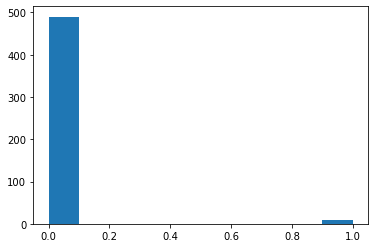

In [ ]:
data_X.shape
plt.hist(data_Vy)
np.unique(data_Vy)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(7468, 118)
(7468,)
(1868, 118)
(1868,)


### RF FS + RF Model

In [ ]:
# Random Forest FS 

rf = SelectFromModel(RandomForestClassifier(n_estimators = 1000), threshold=0.002 )
rf.fit(X_train, Y_train)
selected_feat= len(X_train.columns[(rf.get_support())])
print(selected_feat)
col_names = X_train.columns[(rf.get_support())]
print(col_names)
#n_comp_rf.append(selected_feat)
X_train_rf = rf.transform(X_train)
X_test_rf = rf.transform(X_test)
data_Vx_rf = rf.transform(data_Vx)
#X_test_rf = rf.transform(X_test)
#X_train_rf_list.append(X_train_rf)
#X_test_rf_list.append(X_test_rf) 

57
Index(['intubation_to_extubation', 'gender_id', 'patient_age',
       'Admission_to_surgery', 'BMI', 'f_history_cad', 'diabetes',
       'last_hematocrit', 'Dyslipidemia', 'last_cretenine_preop',
       'hypertension', 'BPsystolic', 'MI_timing', 'NYHA_class',
       'Cardiac_Presentation_on_Admission', 'Angina_class', 'beta_blockers_A',
       'ace_inhibitors_A', 'anti_coagulants', 'aspirin_A', 'lipid_lowering_A',
       'Statin_A', 'left_main_disease', 'ejection_fraction',
       'Aortic_regurgitation', 'Mitral_regurgitation',
       'Tricuspid_regurgitation', 'CABG_status', 'perfusion_time_min',
       'cross_clamp_time_min', 'IABP', 'IABP_indication',
       'intraop_blood_products', 'red_blood_cell_units_A',
       'Total_bypasses_grafted', 'noda_arterial_conduits', 'IMAs',
       'no_of_ima_distal', 'DirectVision', 'noda_venous_conduits',
       'initial_hours_ventilated', 'initial_icu_stay', 'additional_icu_hours',
       'blood_products_used', 'red_blood_cell_units',
       '

In [ ]:
print(X_train_rf.shape)
print(Y_train.shape)

(7470, 54)
(7470,)


In [ ]:
data_Vx_rf.shape

(500, 56)



ROC on Testing Dataset is: 0.9930900327078671
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       942
           1       0.99      1.00      0.99       925

    accuracy                           0.99      1867
   macro avg       0.99      0.99      0.99      1867
weighted avg       0.99      0.99      0.99      1867



ROC on Validation Dataset is: 0.7938775510204082
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       490
           1       0.50      0.60      0.55        10

    accuracy                           0.98       500
   macro avg       0.75      0.79      0.77       500
weighted avg       0.98      0.98      0.98       500



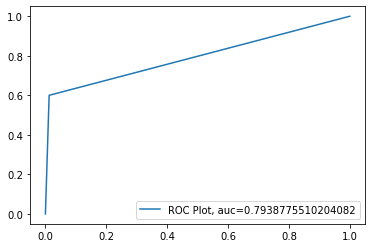

In [ ]:
# Random Forest Classifier

model = RandomForestClassifier()
model.fit(X_train_rf, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_rf)
y_pred_proba = model.predict_proba(X_test_rf)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
#print(accuracy)
print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(data_Vx_rf)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# calc ROC on new samples


### RF FS + XGB Model

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:01:29] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


ROC on Testing Dataset is: 0.9957439605210306
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       942
           1       0.99      1.00      1.00       925

    accuracy                           1.00      1867
   macro avg       1.00      1.00      1.00      1867
weighted avg       1.00      1.00      1.00      1867



ROC on Validation Dataset is: 0.8459183673469388
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       490
           1       0.64      0.70      0.67        10

    accuracy                           0.99       500
   macro avg       0.82      0.85      0.83       500
weighted avg 

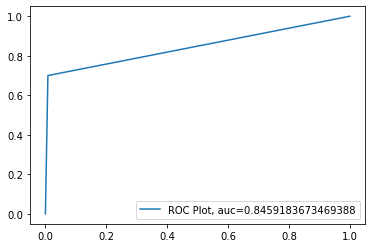

In [ ]:
#model = XGBClassifier()
model = XGBClassifier()
model.fit(X_train_rf, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_rf)
y_pred_proba = model.predict_proba(X_test_rf)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
#print(accuracy)
print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(data_Vx_rf)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# calc ROC on new samples


#### RF FS + LR



ROC on Testing Dataset is: 0.9823865266540427
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       942
           1       0.98      0.99      0.98       925

    accuracy                           0.98      1867
   macro avg       0.98      0.98      0.98      1867
weighted avg       0.98      0.98      0.98      1867



ROC on Validation Dataset is: 0.8357142857142857
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       490
           1       0.33      0.70      0.45        10

    accuracy                           0.97       500
   macro avg       0.66      0.84      0.72       500
weighted avg       0.98      0.97      0.97       500



D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


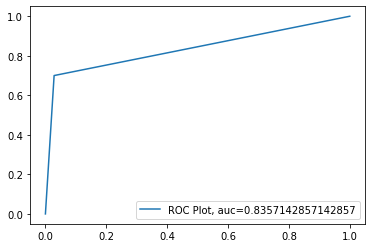

In [ ]:
#model = XGBClassifier()
model = LogisticRegression()
model.fit(X_train_rf, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_rf)
y_pred_proba = model.predict_proba(X_test_rf)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
#print(accuracy)
print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(data_Vx_rf)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# calc ROC on new samples


In [ ]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

### RF FS + SVM



ROC on Testing Dataset is: 0.9644121191254948
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       942
           1       0.99      0.94      0.96       925

    accuracy                           0.96      1867
   macro avg       0.97      0.96      0.96      1867
weighted avg       0.97      0.96      0.96      1867



ROC on Validation Dataset is: 0.7459183673469388
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       490
           1       0.56      0.50      0.53        10

    accuracy                           0.98       500
   macro avg       0.77      0.75      0.76       500
weighted avg       0.98      0.98      0.98       500



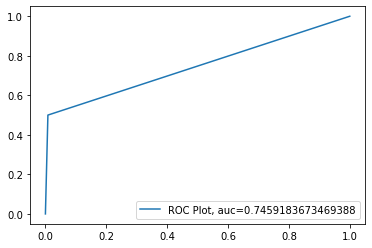

In [ ]:
#model = XGBClassifier()
model = SGDClassifier()
model.fit(X_train_rf, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_rf)
#y_pred_proba = model.predict_proba(X_test_rf)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
#print(accuracy)
print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(data_Vx_rf)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# calc ROC on new samples


In [ ]:
loss = ['hinge', 'log', 'modified_huber', 'squared_hinge','perceptron']
penalty = ['l1', 'l2', 'elasticnet'] 
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 40, 100, 1000] 
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive'] 
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
eta0 = [1, 10, 100] 
param_distributions = dict(loss=loss, 
penalty=penalty, 
alpha=alpha, 
learning_rate=learning_rate, 
class_weight=class_weight, 
eta0=eta0) 
from sklearn.linear_model import SGDClassifier 
from sklearn.model_selection import RandomizedSearchCV 
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5) 
random = RandomizedSearchCV(estimator=sgd, 
param_distributions=param_distributions, 
scoring= 'precision',
verbose=1, n_jobs=-1, 
n_iter=1000) 
random_result = random.fit(X_train_rf, Y_train) 
print('Best Score: ', random_result.best_score_) 
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Best Score:  0.9814416945490615
Best Params:  {'penalty': 'l2', 'loss': 'squared_hinge', 'learning_rate': 'adaptive', 'eta0': 1, 'class_weight': {1: 0.4, 0: 0.6}, 'alpha': 0.0001}


D:\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,




ROC on Testing Dataset is: 0.9785637229586275
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       942
           1       0.98      0.98      0.98       925

    accuracy                           0.98      1867
   macro avg       0.98      0.98      0.98      1867
weighted avg       0.98      0.98      0.98      1867



ROC on Validation Dataset is: 0.8397959183673469
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       490
           1       0.41      0.70      0.52        10

    accuracy                           0.97       500
   macro avg       0.70      0.84      0.75       500
weighted avg       0.98      0.97      0.98       500



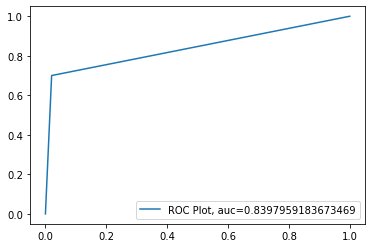

In [ ]:
#model = XGBClassifier()
model = SGDClassifier(penalty = 'l2', loss = 'squared_hinge', learning_rate = 'adaptive', eta0 = 1, class_weight = {1: 0.4, 0: 0.6}, alpha=0.0001)
model.fit(X_train_rf, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_rf)
#y_pred_proba = model.predict_proba(X_test_rf)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
#print(accuracy)
print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(data_Vx_rf)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# calc ROC on new samples


### Lasso FS + XGB

In [ ]:
df__ = df__.sample(frac = 1)

data_X = df__.iloc[:-500,0:len(df__.columns)-1] # stores the dataset except the last column because it the target variable
data_Y =  df__.iloc[:-500,len(df__.columns)-1] # target variable only

data_Vx =  df__.iloc[data_X.shape[0]:, 0: len(df__.columns)-1]
data_Vy = df__.iloc[data_Y.shape[0]:,len(df__.columns)-1]

oversample = SMOTE()
X, y = oversample.fit_resample(data_X, data_Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size = 0.20 ,random_state=42)
#X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=42)

In [ ]:
lasso = SelectFromModel(LogisticRegression(C= 0.0009, penalty='l1', solver = 'saga', max_iter=100000))
lasso.fit(X_train, Y_train)
rm_features = len(X_train.columns[(lasso.estimator_.coef_ == 0).ravel().tolist()])   
#n_comp_lasso.append(len(X_train.columns)-rm_features)
X_train_lasso = lasso.transform(X_train)
X_test_lasso = lasso.transform(X_test)
#X_train_lasso_list.append(X_train_lasso)
#X_test_lasso_list.append(X_test_lasso)
X_lasso = lasso.transform(data_Vx)
#X_test_lasso = lasso.transform(X_test)


In [ ]:
X_lasso.shape

(500, 6)

In [ ]:
X_train_lasso.shape

(7464, 6)

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:41:52] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


ROC on Testing Dataset is: 0.9586647661961469
              precision    recall  f1-score   support

           0       0.98      0.93      0.96       910
           1       0.94      0.98      0.96       956

    accuracy                           0.96      1866
   macro avg       0.96      0.96      0.96      1866
weighted avg       0.96      0.96      0.96      1866



ROC on Validation Dataset is: 0.9001738626485078
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       493
           1       0.18      0.86      0.29         7

    accuracy                           0.94       500
   macro avg       0.59      0.90      0.63       500
weighted avg 

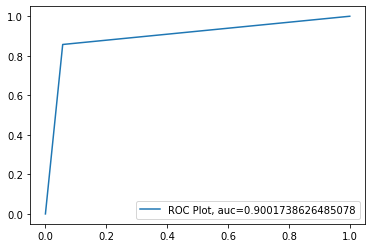

In [ ]:
model = XGBClassifier()
model.fit(X_train_lasso, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_lasso)
y_pred_proba = model.predict_proba(X_test_lasso)
predictions = [round(value) for value in y_pred]
# evaluate predictions

print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_lasso)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Lasso FS + RF




ROC on Testing Dataset is: 0.9604050253657819
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       938
           1       0.95      0.97      0.96       928

    accuracy                           0.96      1866
   macro avg       0.96      0.96      0.96      1866
weighted avg       0.96      0.96      0.96      1866



ROC on Validation Dataset is: 0.8573206607829825
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       491
           1       0.18      0.78      0.30         9

    accuracy                           0.93       500
   macro avg       0.59      0.86      0.63       500
weighted avg       0.98      0.93      0.95       500



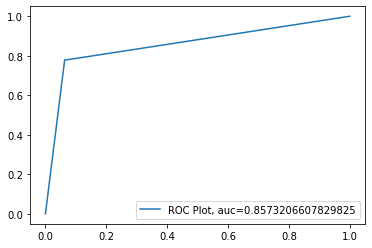

In [ ]:
model = RandomForestClassifier()
model.fit(X_train_lasso, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_lasso)
y_pred_proba = model.predict_proba(X_test_lasso)
predictions = [round(value) for value in y_pred]
# evaluate predictions

print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_lasso)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Lasso FS + LR



ROC on Testing Dataset is: 0.8216031909418425
              precision    recall  f1-score   support

           0       0.77      0.91      0.84       938
           1       0.89      0.73      0.80       928

    accuracy                           0.82      1866
   macro avg       0.83      0.82      0.82      1866
weighted avg       0.83      0.82      0.82      1866



ROC on Validation Dataset is: 0.8369540620049785
              precision    recall  f1-score   support

           0       1.00      0.90      0.94       491
           1       0.12      0.78      0.21         9

    accuracy                           0.89       500
   macro avg       0.56      0.84      0.58       500
weighted avg       0.98      0.89      0.93       500



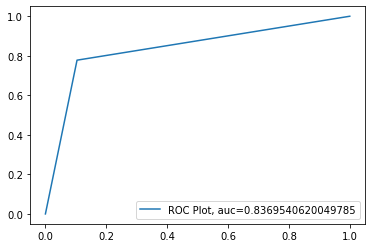

In [ ]:
model = LogisticRegression()
model.fit(X_train_lasso, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_lasso)
y_pred_proba = model.predict_proba(X_test_lasso)
predictions = [round(value) for value in y_pred]
# evaluate predictions

print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_lasso)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Lasso FS + SVM

In [ ]:
loss = ['hinge', 'log', 'modified_huber', 'squared_hinge','perceptron']
penalty = ['l1', 'l2', 'elasticnet'] 
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 40, 100, 1000] 
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive'] 
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
eta0 = [1, 10, 100] 
param_distributions = dict(loss=loss, 
penalty=penalty, 
alpha=alpha, 
learning_rate=learning_rate, 
class_weight=class_weight, 
eta0=eta0) 
from sklearn.linear_model import SGDClassifier 
from sklearn.model_selection import RandomizedSearchCV 
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5) 
random = RandomizedSearchCV(estimator=sgd, 
param_distributions=param_distributions, 
scoring= 'precision',
verbose=1, n_jobs=-1, 
n_iter=1000) 
random_result = random.fit(X_train_lasso, Y_train) 
print('Best Score: ', random_result.best_score_) 
print('Best Params: ', random_result.best_params_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
Best Score:  0.992080745341615
Best Params:  {'penalty': 'l2', 'loss': 'hinge', 'learning_rate': 'optimal', 'eta0': 10, 'class_weight': {1: 0.4, 0: 0.6}, 'alpha': 10}


D:\Anaconda\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,




ROC on Testing Dataset is: 0.7064324314388649
              precision    recall  f1-score   support

           0       0.63      0.99      0.77       938
           1       0.97      0.43      0.59       928

    accuracy                           0.71      1866
   macro avg       0.80      0.71      0.68      1866
weighted avg       0.80      0.71      0.68      1866



ROC on Validation Dataset is: 0.7069472731387192
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       491
           1       0.21      0.44      0.29         9

    accuracy                           0.96       500
   macro avg       0.60      0.71      0.63       500
weighted avg       0.98      0.96      0.97       500



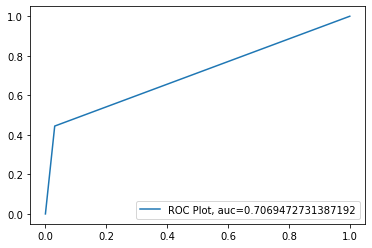

In [ ]:
#model = XGBClassifier()
model = SGDClassifier()
model.fit(X_train_lasso, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_lasso)
#y_pred_proba = model.predict_proba(X_test_rf)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
#print(accuracy)
print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_lasso)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# calc ROC on new samples

In [ ]:
df__ = df__.sample(frac = 1)

data_X = df__.iloc[:-500,0:len(df__.columns)-1] # stores the dataset except the last column because it the target variable
data_Y =  df__.iloc[:-500,len(df__.columns)-1] # target variable only

data_Vx =  df__.iloc[data_X.shape[0]:, 0: len(df__.columns)-1]
data_Vy = df__.iloc[data_Y.shape[0]:,len(df__.columns)-1]

oversample = SMOTE()
X, y = oversample.fit_resample(data_X, data_Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size = 0.20 ,random_state=42)
#X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=42)

In [ ]:
print(X_train.shape)
print(data_Vx.shape)

(7478, 118)
(500, 118)


In [ ]:
l2 = SelectFromModel(LogisticRegression(C= 0.0009, penalty='l2', solver = 'saga', max_iter=100000))
l2.fit(X_train, Y_train)
rm_features = len(X_train.columns[(l2.estimator_.coef_ == 0).ravel().tolist()])   
#n_comp_lasso.append(len(X_train.columns)-rm_features)
X_train_l2 = l2.transform(X_train)
X_test_l2 = l2.transform(X_test)
#X_train_lasso_list.append(X_train_lasso)
#X_test_lasso_list.append(X_test_lasso)
X_l2 = l2.transform(data_Vx)
#X_test_lasso = lasso.transform(X_test)

In [ ]:
X_l2.shape

(500, 40)

In [ ]:
c = l2.get_support()

In [ ]:
feat = X_train.loc[:,c.tolist()].columns.tolist()

In [ ]:
df2 = data_X[data_X.columns.difference(c.tolist())]
df2.columns.tolist()

['AFibFlutter',
 'Active_tobacco_use',
 'Admission_to_surgery',
 'Angina_class',
 'Antibiotic_Type',
 'AortaandAtrialCaval',
 'AorticCrossClamp',
 'Aortic_regurgitation',
 'BMI',
 'BPsystolic',
 'BalloonOcclusion',
 'CABG_status',
 'CPB_utilization_plan',
 'Cardiac_Presentation_on_Admission',
 'Carotid_disease',
 'Cerebovascular_disease',
 'Coronaries_diseased',
 'DirectVision',
 'Dyslipidemia',
 'FemoralArteryandFemVein',
 'FirstCVSurgery',
 'IABP',
 'IABP_indication',
 'IMAs',
 'MI_timing',
 'Miscellaneous_complications',
 'Mitral_regurgitation',
 'NYHA_class',
 'None_F',
 'PCI_timing',
 'PartialCrossClamp',
 'Prior_PCI',
 'Radial_conduit',
 'Reopened_postCABG',
 'Statin_A',
 'SustVTVF',
 'Total_bypasses_grafted',
 'Tricuspid_regurgitation',
 'ace_inhibitors_A',
 'additional_icu_hours',
 'adp_inhibitors_within_5days',
 'anti_coagulants',
 'arrhythmia',
 'aspirin_A',
 'atrial_fibrillation',
 'beta_blockers_A',
 'blood_products_used',
 'bronchodilators',
 'cannulation_method_other',
 '

In [ ]:
imp = model.get_booster().get_score(importance_type="gain")

In [ ]:
imp_mat = pd.DataFrame(imp.items(), columns=['Features', 'Importance'])

In [ ]:
imp_mat

,Importance,Features
0,1.269067,gender_id
1,1.485501,Active_tobacco_use
2,2.761302,f_history_cad
3,3.529690,diabetes
4,4.941990,Dyslipidemia
5,1.724763,last_cretenine_preop
6,1.165087,hypertension
7,3.723628,PCI_timing
8,1.177107,NYHA_class
9,1.381882,Cardiac_Presentation_on_Admission


In [ ]:
imp_mat = pd.DataFrame(imp.items(), columns=['Features', 'Importance'])
imp_mat = imp_mat.drop(['Features'], axis = 1)
imp_mat['Features']= feat
imp_mat
imp_mat = imp_mat.sort_values(['Importance'], ascending = False)
imp_mat.to_csv('feat_imp_40.csv')

,Importance,Features
0,1.269067,gender_id
1,1.485501,Active_tobacco_use
2,2.761302,f_history_cad
3,3.529690,diabetes
4,4.941990,Dyslipidemia
5,1.724763,last_cretenine_preop
6,1.165087,hypertension
7,3.723628,PCI_timing
8,1.177107,NYHA_class
9,1.381882,Cardiac_Presentation_on_Admission


In [ ]:
imp_at = imp_mat.sort_values(['Importance'], ascending = False)
imp_mat.to_csv('feat_imp_40.csv')

### Ridge FS + XGB

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:37:50] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


ROC on Testing Dataset is: 0.9935885997181501
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       936
           1       0.99      1.00      0.99       934

    accuracy                           0.99      1870
   macro avg       0.99      0.99      0.99      1870
weighted avg       0.99      0.99      0.99      1870



ROC on Validation Dataset is: 0.9423697556477639
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       482
           1       0.89      0.89      0.89        18

    accuracy                           0.99       500
   macro avg       0.94      0.94      0.94       500
weighted avg 

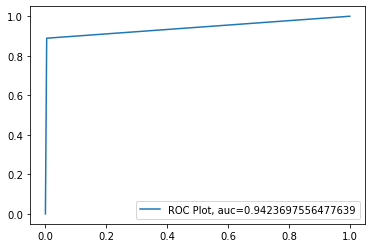

In [ ]:
model = XGBClassifier()
model.fit(X_train_l2, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_l2)
y_pred_proba = model.predict_proba(X_test_l2)
predictions = [round(value) for value in y_pred]
# evaluate predictions

print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_l2)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Ridge FS + RF



ROC on Testing Dataset is: 0.9951639343324629
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       927
           1       0.99      1.00      1.00       943

    accuracy                           1.00      1870
   macro avg       1.00      1.00      1.00      1870
weighted avg       1.00      1.00      1.00      1870



ROC on Validation Dataset is: 0.967035500230521
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       482
           1       0.77      0.94      0.85        18

    accuracy                           0.99       500
   macro avg       0.89      0.97      0.92       500
weighted avg       0.99      0.99      0.99       500



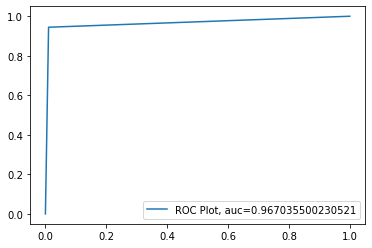

In [ ]:
model = RandomForestClassifier()
model.fit(X_train_l2, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_l2)
y_pred_proba = model.predict_proba(X_test_l2)
predictions = [round(value) for value in y_pred]
# evaluate predictions

print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_l2)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Ridge FS + LR



ROC on Testing Dataset is: 0.9845327990959059
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       945
           1       0.98      0.99      0.98       927

    accuracy                           0.98      1872
   macro avg       0.98      0.98      0.98      1872
weighted avg       0.98      0.98      0.98      1872



ROC on Validation Dataset is: 0.9082633053221288
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       476
           1       0.71      0.83      0.77        24

    accuracy                           0.98       500
   macro avg       0.85      0.91      0.88       500
weighted avg       0.98      0.98      0.98       500



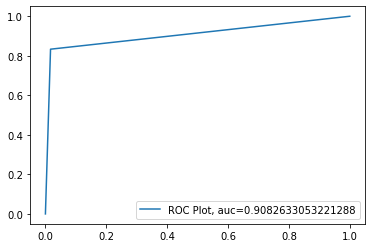

In [ ]:
model = LogisticRegression(max_iter = 1100)
model.fit(X_train_l2, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_l2)
y_pred_proba = model.predict_proba(X_test_l2)
predictions = [round(value) for value in y_pred]
# evaluate predictions

print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_l2)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### Ridge FS + SVM



ROC on Testing Dataset is: 0.9834951456310679
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       945
           1       0.98      0.99      0.98       927

    accuracy                           0.98      1872
   macro avg       0.98      0.98      0.98      1872
weighted avg       0.98      0.98      0.98      1872



ROC on Validation Dataset is: 0.943627450980392
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       476
           1       0.61      0.92      0.73        24

    accuracy                           0.97       500
   macro avg       0.80      0.94      0.86       500
weighted avg       0.98      0.97      0.97       500



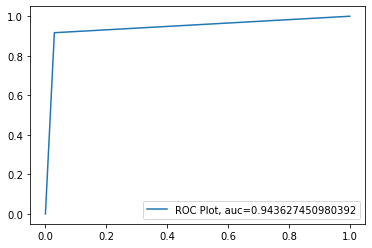

In [ ]:
#model = XGBClassifier()
model = SGDClassifier()
model.fit(X_train_l2, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_l2)
#y_pred_proba = model.predict_proba(X_test_rf)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
#print(accuracy)
print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_l2)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# calc ROC on new samples

In [ ]:
df__ = df__.sample(frac = 1)

data_X = df__.iloc[:-500,0:len(df__.columns)-1] # stores the dataset except the last column because it the target variable
data_Y =  df__.iloc[:-500,len(df__.columns)-1] # target variable only

data_Vx =  df__.iloc[data_X.shape[0]:, 0: len(df__.columns)-1]
data_Vy = df__.iloc[data_Y.shape[0]:,len(df__.columns)-1]

oversample = SMOTE()
X, y = oversample.fit_resample(data_X, data_Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size = 0.20 ,random_state=42)
#X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=42)

In [ ]:
pca = PCA(0.98 ,svd_solver='full') # pca method
pca.fit(X_train) # fit on training sample
#print()
X_train_pca = pca.transform(X_train) # transform training set
X_test_pca = pca.transform(X_test) # transform testing set
X_pca = pca.transform(data_Vx)
#X_train_pca_list.append(X_train_pca) # append the transformed training set to a list
#X_test_pca_list.append(X_test_pca) # append transformed testing set to a list
print(pca.n_components_)
print(pca.explained_variance_ratio_)

10
[0.70939521 0.17215344 0.04797423 0.01451477 0.0117235  0.00997646
 0.00750931 0.00326948 0.00278827 0.00242271]


### PCA FS + XGB

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:19:13] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


ROC on Testing Dataset is: 0.9718183810637053
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       944
           1       0.96      0.99      0.97       928

    accuracy                           0.97      1872
   macro avg       0.97      0.97      0.97      1872
weighted avg       0.97      0.97      0.97      1872



ROC on Validation Dataset is: 0.7703499429440851
              precision    recall  f1-score   support

           0       0.98      0.95      0.96       478
           1       0.35      0.59      0.44        22

    accuracy                           0.93       500
   macro avg       0.67      0.77      0.70       500
weighted avg 

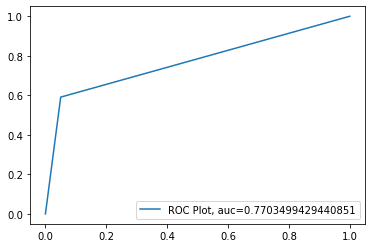

In [ ]:
model = XGBClassifier()
model.fit(X_train_pca, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_pca)
y_pred_proba = model.predict_proba(X_test_pca)
predictions = [round(value) for value in y_pred]
# evaluate predictions

print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_pca)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### PCA FS + RF



ROC on Testing Dataset is: 0.9701472092343659
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       944
           1       0.96      0.98      0.97       928

    accuracy                           0.97      1872
   macro avg       0.97      0.97      0.97      1872
weighted avg       0.97      0.97      0.97      1872



ROC on Validation Dataset is: 0.8147584632940281
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       478
           1       0.38      0.68      0.48        22

    accuracy                           0.94       500
   macro avg       0.68      0.81      0.72       500
weighted avg       0.96      0.94      0.94       500



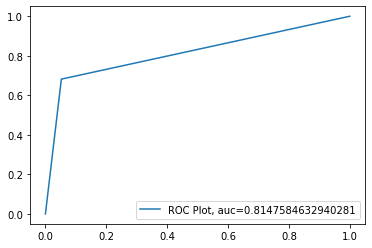

In [ ]:
model = RandomForestClassifier()
model.fit(X_train_pca, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_pca)
y_pred_proba = model.predict_proba(X_test_pca)
predictions = [round(value) for value in y_pred]
# evaluate predictions

print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_pca)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### PCA FS + LR



ROC on Testing Dataset is: 0.8296317942723553
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       944
           1       0.87      0.77      0.82       928

    accuracy                           0.83      1872
   macro avg       0.83      0.83      0.83      1872
weighted avg       0.83      0.83      0.83      1872



ROC on Validation Dataset is: 0.8596424496006086
              precision    recall  f1-score   support

           0       0.99      0.86      0.92       478
           1       0.22      0.86      0.35        22

    accuracy                           0.86       500
   macro avg       0.60      0.86      0.63       500
weighted avg       0.96      0.86      0.89       500



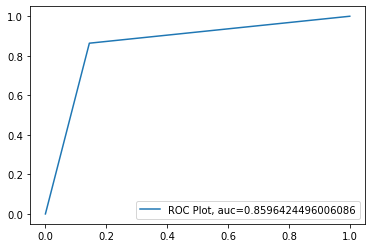

In [ ]:
model = LogisticRegression(max_iter = 1100)
model.fit(X_train_pca, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_pca)
y_pred_proba = model.predict_proba(X_test_pca)
predictions = [round(value) for value in y_pred]
# evaluate predictions

print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_pca)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### PCA FS + SVM



ROC on Testing Dataset is: 0.6960385008766803
              precision    recall  f1-score   support

           0       0.68      0.76      0.72       944
           1       0.72      0.63      0.67       928

    accuracy                           0.70      1872
   macro avg       0.70      0.70      0.70      1872
weighted avg       0.70      0.70      0.70      1872



ROC on Validation Dataset is: 0.7101559528337771
              precision    recall  f1-score   support

           0       0.98      0.74      0.84       478
           1       0.11      0.68      0.19        22

    accuracy                           0.74       500
   macro avg       0.54      0.71      0.51       500
weighted avg       0.94      0.74      0.81       500



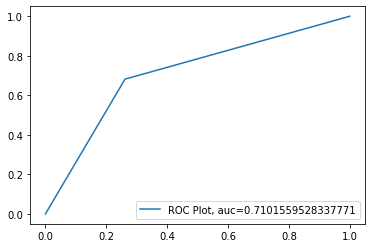

In [ ]:
#model = XGBClassifier()
model = SGDClassifier()
model.fit(X_train_pca, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_pca)
#y_pred_proba = model.predict_proba(X_test_rf)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
#print(accuracy)
print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_pca)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# calc ROC on new samples

In [ ]:
df__ = df__.sample(frac = 1)

data_X = df__.iloc[:-500,0:len(df__.columns)-1] # stores the dataset except the last column because it the target variable
data_Y =  df__.iloc[:-500,len(df__.columns)-1] # target variable only

data_Vx =  df__.iloc[data_X.shape[0]:, 0: len(df__.columns)-1]
data_Vy = df__.iloc[data_Y.shape[0]:,len(df__.columns)-1]

oversample = SMOTE()
X, y = oversample.fit_resample(data_X, data_Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size = 0.20 ,random_state=42)
#X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=42)

In [ ]:
xgb = SelectFromModel(XGBClassifier(n_estimators = 1000), threshold=0.002 )
xgb.fit(X_train, Y_train)
selected_feat= len(X_train.columns[(xgb.get_support())])
print(selected_feat)
col_names = X_train.columns[(xgb.get_support())]
print(col_names)
#n_comp_rf.append(selected_feat)
X_train_xgb = xgb.transform(X_train)
X_test_xgb = xgb.transform(X_test)
X_xgb = xgb.transform(data_Vx)
#X_test_rf = rf.transform(X_test)
#X_train_rf_list.append(X_train_rf)
#X_test_rf_list.append(X_test_rf) 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:31:39] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
43
Index(['intubation_to_extubation', 'Active_tobacco_use', 'f_history_cad',
       'diabetes', 'Dyslipidemia', 'last_cretenine_preop', 'hypertension',
       'previous_cv_interventions', 'PCI_timing', 'MI_timing',
       'congestive_heart_failure_A', 'Angina_class', 'arrhythmia',
       'beta_blockers_A', 'ace_inhibitors_A', 'nitratesIV', 'aspirin_A',
       'lipid_lowering_A', 'adp_inhibitors_within_5days', 'left_main_disease',
       'pulmonary_artery_hypertension', 'Aortic_regurgitation',
       'Tricuspid_regurgitation', 'IABP_indication', 'intraop_blood_products',
       'fresh_frozen_plasma_units_A', 'platelet_units_A',
       'noda_venous_conduits', 'initial_hours_ventilated',
       'readmissi

D:\Anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\Anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\Anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


### XGB FS + XGB

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:31:48] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


ROC on Testing Dataset is: 0.9957170305356463
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       942
           1       1.00      1.00      1.00       926

    accuracy                           1.00      1868
   macro avg       1.00      1.00      1.00      1868
weighted avg       1.00      1.00      1.00      1868



ROC on Validation Dataset is: 0.8399936818827989
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       487
           1       0.60      0.69      0.64        13

    accuracy                           0.98       500
   macro avg       0.80      0.84      0.82       500
weighted avg 

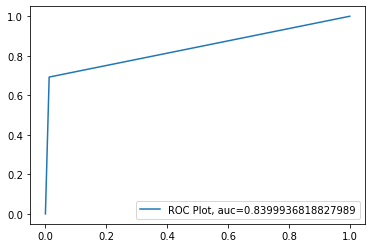

In [ ]:
model = XGBClassifier()
model.fit(X_train_xgb, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_xgb)
y_pred_proba = model.predict_proba(X_test_xgb)
predictions = [round(value) for value in y_pred]
# evaluate predictions

print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_xgb)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### XGB FS + RF



ROC on Testing Dataset is: 0.9952137586954828
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       942
           1       0.99      1.00      1.00       926

    accuracy                           1.00      1868
   macro avg       1.00      1.00      1.00      1868
weighted avg       1.00      1.00      1.00      1868



ROC on Validation Dataset is: 0.9138366766703523
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       487
           1       0.55      0.85      0.67        13

    accuracy                           0.98       500
   macro avg       0.77      0.91      0.83       500
weighted avg       0.98      0.98      0.98       500



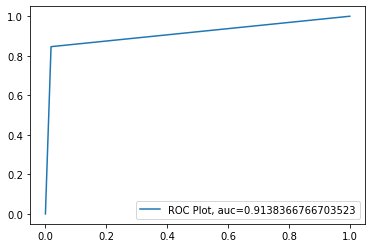

In [ ]:
model = RandomForestClassifier()
model.fit(X_train_xgb, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_xgb)
y_pred_proba = model.predict_proba(X_test_xgb)
predictions = [round(value) for value in y_pred]
# evaluate predictions

print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_xgb)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### XGB FS + LR



ROC on Testing Dataset is: 0.9790975957592183
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       942
           1       0.98      0.98      0.98       926

    accuracy                           0.98      1868
   macro avg       0.98      0.98      0.98      1868
weighted avg       0.98      0.98      0.98      1868



ROC on Validation Dataset is: 0.9430579687253199
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       487
           1       0.40      0.92      0.56        13

    accuracy                           0.96       500
   macro avg       0.70      0.94      0.77       500
weighted avg       0.98      0.96      0.97       500



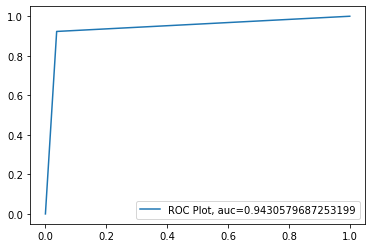

In [ ]:
model = LogisticRegression(max_iter = 1100)
model.fit(X_train_xgb, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_xgb)
y_pred_proba = model.predict_proba(X_test_xgb)
predictions = [round(value) for value in y_pred]
# evaluate predictions

print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_xgb)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### XGB FS + SVM



ROC on Testing Dataset is: 0.9473685417268529
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       942
           1       0.97      0.93      0.95       926

    accuracy                           0.95      1868
   macro avg       0.95      0.95      0.95      1868
weighted avg       0.95      0.95      0.95      1868



ROC on Validation Dataset is: 0.8184331069341336
              precision    recall  f1-score   support

           0       0.99      0.94      0.97       487
           1       0.25      0.69      0.37        13

    accuracy                           0.94       500
   macro avg       0.62      0.82      0.67       500
weighted avg       0.97      0.94      0.95       500



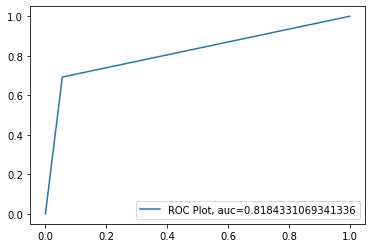

In [ ]:
#model = XGBClassifier()
model = SGDClassifier()
model.fit(X_train_xgb, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_xgb)
#y_pred_proba = model.predict_proba(X_test_rf)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
#print(accuracy)
print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_xgb)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# calc ROC on new samples

## Oversampling + undersampling (Post and intra op)

In [ ]:
from imblearn.pipeline import Pipeline

In [ ]:
df__ = df__.sample(frac = 1)

data_X = df__.iloc[:-500,0:len(df__.columns)-1] # stores the dataset except the last column because it the target variable
data_Y =  df__.iloc[:-500,len(df__.columns)-1] # target variable only

data_Vx =  df__.iloc[data_X.shape[0]:, 0: len(df__.columns)-1]
data_Vy = df__.iloc[data_Y.shape[0]:,len(df__.columns)-1]

over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.7)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(data_X, data_Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size = 0.20 ,random_state=42)
#X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=42)

(array([3332.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2333.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

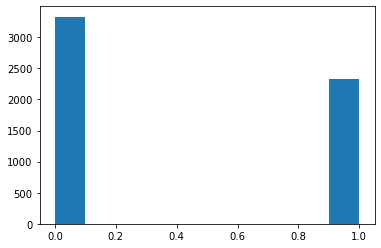

In [ ]:
plt.hist(y)

In [ ]:
rf = SelectFromModel(RandomForestClassifier(n_estimators = 1000), threshold=0.002 )
rf.fit(X_train, Y_train)
selected_feat= len(X_train.columns[(rf.get_support())])
print(selected_feat)
col_names = X_train.columns[(rf.get_support())]
print(col_names)
#n_comp_rf.append(selected_feat)
X_train_rf = rf.transform(X_train)
X_test_rf = rf.transform(X_test)
data_Vx_rf = rf.transform(data_Vx)
#X_test_rf = rf.transform(X_test)
#X_train_rf_list.append(X_train_rf)
#X_test_rf_list.append(X_test_rf) 

55
Index(['intubation_to_extubation', 'gender_id', 'patient_age',
       'Admission_to_surgery', 'BMI', 'f_history_cad', 'diabetes',
       'last_hematocrit', 'Dyslipidemia', 'last_cretenine_preop', 'BPsystolic',
       'MI_timing', 'NYHA_class', 'Cardiac_Presentation_on_Admission',
       'Angina_class', 'beta_blockers_A', 'ace_inhibitors_A',
       'anti_coagulants', 'aspirin_A', 'lipid_lowering_A', 'Statin_A',
       'left_main_disease', 'ejection_fraction', 'Mitral_regurgitation',
       'CABG_status', 'perfusion_time_min', 'cross_clamp_time_min', 'IABP',
       'IABP_indication', 'intraop_blood_products', 'red_blood_cell_units_A',
       'platelet_units_A', 'Total_bypasses_grafted', 'noda_arterial_conduits',
       'IMAs', 'no_of_ima_distal', 'DirectVision', 'noda_venous_conduits',
       'initial_hours_ventilated', 'initial_icu_stay', 'additional_icu_hours',
       'blood_products_used', 'red_blood_cell_units',
       'fresh_frozen_plasma_units', 'platelet_units',
       'reintub

### RF FS + XGB

In [ ]:
df__ = df__.sample(frac = 1)

data_X = df__.iloc[:-500,0:len(df__.columns)-1] # stores the dataset except the last column because it the target variable
data_Y =  df__.iloc[:-500,len(df__.columns)-1] # target variable only

data_Vx =  df__.iloc[data_X.shape[0]:, 0: len(df__.columns)-1]
data_Vy = df__.iloc[data_Y.shape[0]:,len(df__.columns)-1]

over = SMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(data_X, data_Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size = 0.20 ,random_state=42)
#X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=42)

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:33:19] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


ROC on Testing Dataset is: 0.9923287054262048
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       687
           1       0.98      1.00      0.99       446

    accuracy                           0.99      1133
   macro avg       0.99      0.99      0.99      1133
weighted avg       0.99      0.99      0.99      1133



ROC on Validation Dataset is: 0.9908163265306122
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       490
           1       0.53      1.00      0.69        10

    accuracy                           0.98       500
   macro avg       0.76      0.99      0.84       500
weighted avg 

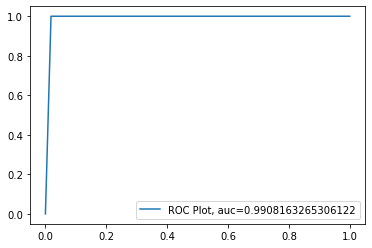

In [ ]:
#model = XGBClassifier()
model = XGBClassifier()
model.fit(X_train_rf, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_rf)
#y_pred_proba = model.predict_proba(X_test_rf)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
#print(accuracy)
print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(data_Vx_rf)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# calc ROC on new samples


### RF FS + RF



ROC on Testing Dataset is: 0.9905385735080059
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       687
           1       0.97      1.00      0.99       446

    accuracy                           0.99      1133
   macro avg       0.99      0.99      0.99      1133
weighted avg       0.99      0.99      0.99      1133



ROC on Validation Dataset is: 0.9938775510204081
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       490
           1       0.62      1.00      0.77        10

    accuracy                           0.99       500
   macro avg       0.81      0.99      0.88       500
weighted avg       0.99      0.99      0.99       500



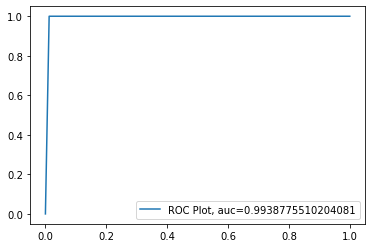

In [ ]:
#model = XGBClassifier()
model = RandomForestClassifier()
model.fit(X_train_rf, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_rf)
#y_pred_proba = model.predict_proba(X_test_rf)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
#print(accuracy)
print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(data_Vx_rf)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# calc ROC on new samples


### RF FS + LR



ROC on Testing Dataset is: 0.967113465316806
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       687
           1       0.96      0.96      0.96       446

    accuracy                           0.97      1133
   macro avg       0.97      0.97      0.97      1133
weighted avg       0.97      0.97      0.97      1133



ROC on Validation Dataset is: 0.9846938775510203
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       490
           1       0.40      1.00      0.57        10

    accuracy                           0.97       500
   macro avg       0.70      0.98      0.78       500
weighted avg       0.99      0.97      0.98       500



D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


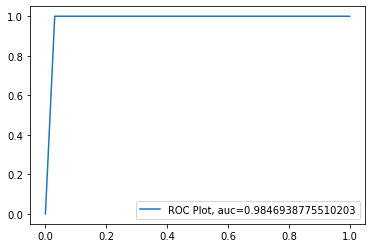

In [ ]:
#model = XGBClassifier()
model = LogisticRegression()
model.fit(X_train_rf, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_rf)
#y_pred_proba = model.predict_proba(X_test_rf)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
#print(accuracy)
print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(data_Vx_rf)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# calc ROC on new samples


### RF FS + SVM



ROC on Testing Dataset is: 0.9732296133837247
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       687
           1       0.94      0.98      0.96       446

    accuracy                           0.97      1133
   macro avg       0.97      0.97      0.97      1133
weighted avg       0.97      0.97      0.97      1133



ROC on Validation Dataset is: 0.9816326530612245
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       490
           1       0.36      1.00      0.53        10

    accuracy                           0.96       500
   macro avg       0.68      0.98      0.75       500
weighted avg       0.99      0.96      0.97       500



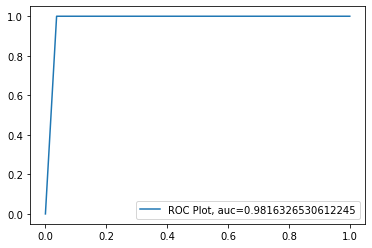

In [ ]:
#model = XGBClassifier()
model = SGDClassifier()
model.fit(X_train_rf, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_rf)
#y_pred_proba = model.predict_proba(X_test_rf)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
#print(accuracy)
print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(data_Vx_rf)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# calc ROC on new samples


### Lasso FS + XGB

In [ ]:
df__ = df__.sample(frac = 1)

data_X = df__.iloc[:-500,0:len(df__.columns)-1] # stores the dataset except the last column because it the target variable
data_Y =  df__.iloc[:-500,len(df__.columns)-1] # target variable only

data_Vx =  df__.iloc[data_X.shape[0]:, 0: len(df__.columns)-1]
data_Vy = df__.iloc[data_Y.shape[0]:,len(df__.columns)-1]

over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.7)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(data_X, data_Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size = 0.20 ,random_state=42)
#X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=42)

In [ ]:
lasso = SelectFromModel(LogisticRegression(C= 0.009, penalty='l1', solver = 'saga', max_iter=100000))
lasso.fit(X_train, Y_train)
rm_features = len(X_train.columns[(lasso.estimator_.coef_ == 0).ravel().tolist()])   
#n_comp_lasso.append(len(X_train.columns)-rm_features)
X_train_lasso = lasso.transform(X_train)
X_test_lasso = lasso.transform(X_test)
#X_train_lasso_list.append(X_train_lasso)
#X_test_lasso_list.append(X_test_lasso)
X_lasso = lasso.transform(data_Vx)
#X_test_lasso = lasso.transform(X_test)


In [ ]:
X_lasso.shape

(500, 32)

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:10:30] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


ROC on Testing Dataset is: 0.9892740908447715
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       740
           1       0.97      0.99      0.98       382

    accuracy                           0.99      1122
   macro avg       0.98      0.99      0.99      1122
weighted avg       0.99      0.99      0.99      1122



ROC on Validation Dataset is: 0.9045183290707587
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       483
           1       0.67      0.82      0.74        17

    accuracy                           0.98       500
   macro avg       0.83      0.90      0.86       500
weighted avg 

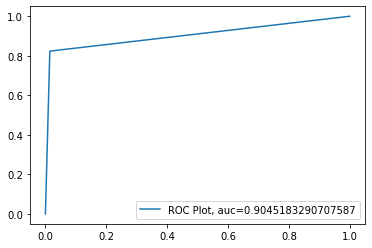

In [ ]:
#model = XGBClassifier()
model = XGBClassifier()
model.fit(X_train_lasso, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_lasso)
#y_pred_proba = model.predict_proba(X_test_rf)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
#print(accuracy)
print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_lasso)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# calc ROC on new samples

### Lasso FS + Rf



ROC on Testing Dataset is: 0.9885984151690957
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       740
           1       0.97      0.99      0.98       382

    accuracy                           0.99      1122
   macro avg       0.98      0.99      0.99      1122
weighted avg       0.99      0.99      0.99      1122



ROC on Validation Dataset is: 0.9328948970892705
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       483
           1       0.65      0.88      0.75        17

    accuracy                           0.98       500
   macro avg       0.82      0.93      0.87       500
weighted avg       0.98      0.98      0.98       500



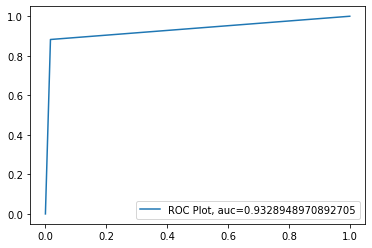

In [ ]:
#model = XGBClassifier()
model = RandomForestClassifier()
model.fit(X_train_lasso, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_lasso)
#y_pred_proba = model.predict_proba(X_test_rf)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
#print(accuracy)
print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_lasso)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# calc ROC on new samples

### Lasso FS + LR



ROC on Testing Dataset is: 0.9594205462006509
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       740
           1       0.92      0.96      0.94       382

    accuracy                           0.96      1122
   macro avg       0.95      0.96      0.95      1122
weighted avg       0.96      0.96      0.96      1122



ROC on Validation Dataset is: 0.9602362684204117
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       483
           1       0.62      0.94      0.74        17

    accuracy                           0.98       500
   macro avg       0.81      0.96      0.87       500
weighted avg       0.98      0.98      0.98       500



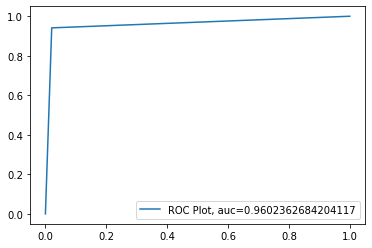

In [ ]:
#model = XGBClassifier()
model = LogisticRegression(max_iter = 10000)
model.fit(X_train_lasso, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_lasso)
#y_pred_proba = model.predict_proba(X_test_rf)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
#print(accuracy)
print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_lasso)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# calc ROC on new samples

### Lasso FS + SVM



ROC on Testing Dataset is: 0.9006756756756757
              precision    recall  f1-score   support

           0       1.00      0.80      0.89       740
           1       0.72      1.00      0.84       382

    accuracy                           0.87      1122
   macro avg       0.86      0.90      0.86      1122
weighted avg       0.91      0.87      0.87      1122



ROC on Validation Dataset is: 0.9192546583850932
              precision    recall  f1-score   support

           0       1.00      0.84      0.91       483
           1       0.18      1.00      0.30        17

    accuracy                           0.84       500
   macro avg       0.59      0.92      0.61       500
weighted avg       0.97      0.84      0.89       500



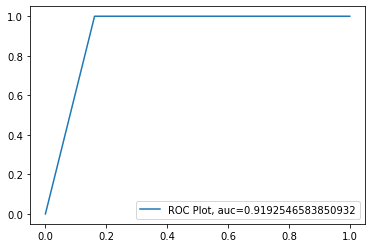

In [ ]:
#model = XGBClassifier()
model = SGDClassifier()
model.fit(X_train_lasso, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_lasso)
#y_pred_proba = model.predict_proba(X_test_rf)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
#print(accuracy)
print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_lasso)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# calc ROC on new samples

### Ridge FS + XGB

In [ ]:
df__ = df__.sample(frac = 1)

data_X = df__.iloc[:-500,0:len(df__.columns)-1] # stores the dataset except the last column because it the target variable
data_Y =  df__.iloc[:-500,len(df__.columns)-1] # target variable only

data_Vx =  df__.iloc[data_X.shape[0]:, 0: len(df__.columns)-1]
data_Vy = df__.iloc[data_Y.shape[0]:,len(df__.columns)-1]

over = SMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(data_X, data_Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size = 0.20 ,random_state=42)
#X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=42)

In [ ]:
l2 = SelectFromModel(LogisticRegression(C= 0.0009, penalty='l2', solver = 'saga', max_iter=100000))
l2.fit(X_train, Y_train)
rm_features = len(X_train.columns[(lasso.estimator_.coef_ == 0).ravel().tolist()])   
#n_comp_lasso.append(len(X_train.columns)-rm_features)
X_train_l2 = l2.transform(X_train)
X_test_l2 = l2.transform(X_test)
#X_train_lasso_list.append(X_train_lasso)
#X_test_lasso_list.append(X_test_lasso)
X_l2 = l2.transform(data_Vx)
#X_test_lasso = lasso.transform(X_test)

In [ ]:
X_l2.shape

(500, 40)

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:12:12] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


ROC on Testing Dataset is: 0.9913608518298083
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       757
           1       0.97      1.00      0.98       364

    accuracy                           0.99      1121
   macro avg       0.98      0.99      0.99      1121
weighted avg       0.99      0.99      0.99      1121



ROC on Validation Dataset is: 0.8990185950413223
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       484
           1       0.65      0.81      0.72        16

    accuracy                           0.98       500
   macro avg       0.82      0.90      0.86       500
weighted avg 

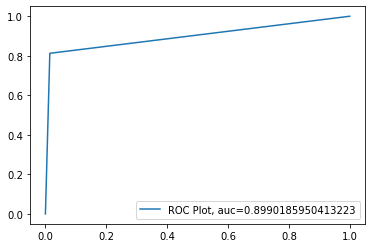

In [ ]:
#model = XGBClassifier()
model = XGBClassifier()
model.fit(X_train_l2, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_l2)
#y_pred_proba = model.predict_proba(X_test_rf)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
#print(accuracy)
print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_l2)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# calc ROC on new samples

### Ridge FS + RF



ROC on Testing Dataset is: 0.989326723474676
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       757
           1       0.97      0.99      0.98       364

    accuracy                           0.99      1121
   macro avg       0.98      0.99      0.99      1121
weighted avg       0.99      0.99      0.99      1121



ROC on Validation Dataset is: 0.868801652892562
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       484
           1       0.67      0.75      0.71        16

    accuracy                           0.98       500
   macro avg       0.83      0.87      0.85       500
weighted avg       0.98      0.98      0.98       500



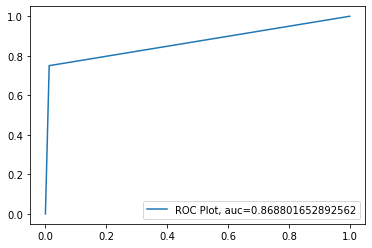

In [ ]:
#model = XGBClassifier()
model = RandomForestClassifier()
model.fit(X_train_l2, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_l2)
#y_pred_proba = model.predict_proba(X_test_rf)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
#print(accuracy)
print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_l2)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# calc ROC on new samples

### Ridge FS + LR



ROC on Testing Dataset is: 0.9763035841305326
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       757
           1       0.96      0.97      0.97       364

    accuracy                           0.98      1121
   macro avg       0.97      0.98      0.98      1121
weighted avg       0.98      0.98      0.98      1121



ROC on Validation Dataset is: 0.8969524793388429
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       484
           1       0.59      0.81      0.68        16

    accuracy                           0.98       500
   macro avg       0.79      0.90      0.84       500
weighted avg       0.98      0.98      0.98       500



D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


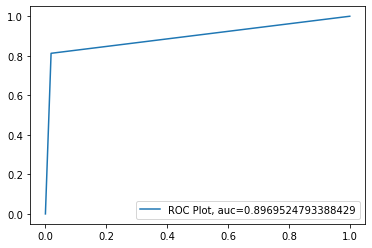

In [ ]:
#model = XGBClassifier()
model = LogisticRegression()
model.fit(X_train_l2, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_l2)
#y_pred_proba = model.predict_proba(X_test_rf)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
#print(accuracy)
print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_l2)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# calc ROC on new samples

### Ridge FS + SVM



ROC on Testing Dataset is: 0.9766193185942195
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       757
           1       0.93      0.99      0.96       364

    accuracy                           0.97      1121
   macro avg       0.96      0.98      0.97      1121
weighted avg       0.97      0.97      0.97      1121



ROC on Validation Dataset is: 0.890754132231405
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       484
           1       0.46      0.81      0.59        16

    accuracy                           0.96       500
   macro avg       0.73      0.89      0.79       500
weighted avg       0.98      0.96      0.97       500



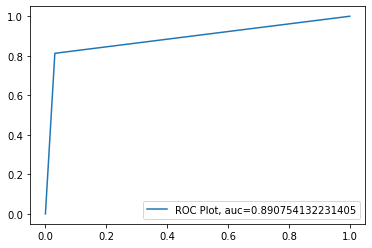

In [ ]:
#model = XGBClassifier()
model = SGDClassifier()
model.fit(X_train_l2, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_l2)
#y_pred_proba = model.predict_proba(X_test_rf)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
#print(accuracy)
print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_l2)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# calc ROC on new samples

### PCA FS + XGB

In [ ]:
df__ = df__.sample(frac = 1)

data_X = df__.iloc[:-500,0:len(df__.columns)-1] # stores the dataset except the last column because it the target variable
data_Y =  df__.iloc[:-500,len(df__.columns)-1] # target variable only

data_Vx =  df__.iloc[data_X.shape[0]:, 0: len(df__.columns)-1]
data_Vy = df__.iloc[data_Y.shape[0]:,len(df__.columns)-1]

over = SMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(data_X, data_Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size = 0.20 ,random_state=42)
#X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=42)

In [ ]:
pca = PCA(0.98 ,svd_solver='full') # pca method
pca.fit(X_train) # fit on training sample
#print()
X_train_pca = pca.transform(X_train) # transform training set
X_test_pca = pca.transform(X_test) # transform testing set
X_pca = pca.transform(data_Vx)
#X_train_pca_list.append(X_train_pca) # append the transformed training set to a list
#X_test_pca_list.append(X_test_pca) # append transformed testing set to a list
print(pca.n_components_)
print(pca.explained_variance_ratio_)

7
[0.8091629  0.11385403 0.03258353 0.00978335 0.00746665 0.00584362
 0.00446444]


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:12:43] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


ROC on Testing Dataset is: 0.9458000602141905
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       746
           1       0.92      0.93      0.93       374

    accuracy                           0.95      1120
   macro avg       0.94      0.95      0.94      1120
weighted avg       0.95      0.95      0.95      1120



ROC on Validation Dataset is: 0.7346938775510204
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       490
           1       0.25      0.50      0.33        10

    accuracy                           0.96       500
   macro avg       0.62      0.73      0.66       500
weighted avg 

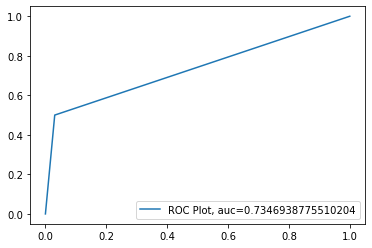

In [ ]:
model = XGBClassifier()
model.fit(X_train_pca, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_pca)
y_pred_proba = model.predict_proba(X_test_pca)
predictions = [round(value) for value in y_pred]
# evaluate predictions

print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_pca)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### PCA FS + RF



ROC on Testing Dataset is: 0.9257394159223524
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       746
           1       0.91      0.90      0.90       374

    accuracy                           0.93      1120
   macro avg       0.93      0.93      0.93      1120
weighted avg       0.93      0.93      0.93      1120



ROC on Validation Dataset is: 0.7316326530612245
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       490
           1       0.22      0.50      0.30        10

    accuracy                           0.95       500
   macro avg       0.60      0.73      0.64       500
weighted avg       0.97      0.95      0.96       500



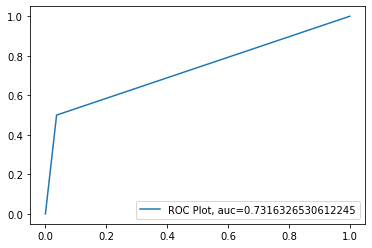

In [ ]:
model = RandomForestClassifier()
model.fit(X_train_pca, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_pca)
y_pred_proba = model.predict_proba(X_test_pca)
predictions = [round(value) for value in y_pred]
# evaluate predictions

print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_pca)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### PCA FS + LR



ROC on Testing Dataset is: 0.7639532049719716
              precision    recall  f1-score   support

           0       0.82      0.94      0.87       746
           1       0.82      0.59      0.69       374

    accuracy                           0.82      1120
   macro avg       0.82      0.76      0.78      1120
weighted avg       0.82      0.82      0.81      1120



ROC on Validation Dataset is: 0.8244897959183675
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       490
           1       0.22      0.70      0.33        10

    accuracy                           0.94       500
   macro avg       0.61      0.82      0.65       500
weighted avg       0.98      0.94      0.96       500



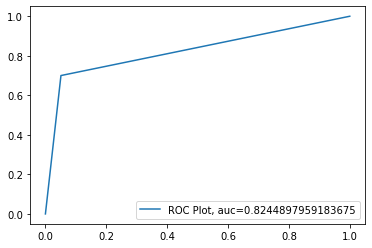

In [ ]:
model = LogisticRegression(max_iter = 1100)
model.fit(X_train_pca, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_pca)
y_pred_proba = model.predict_proba(X_test_pca)
predictions = [round(value) for value in y_pred]
# evaluate predictions

print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_pca)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### PCA FS + SVM



ROC on Testing Dataset is: 0.689599432266204
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       746
           1       0.61      0.56      0.58       374

    accuracy                           0.73      1120
   macro avg       0.70      0.69      0.69      1120
weighted avg       0.73      0.73      0.73      1120



ROC on Validation Dataset is: 0.7081632653061225
              precision    recall  f1-score   support

           0       0.99      0.82      0.89       490
           1       0.06      0.60      0.11        10

    accuracy                           0.81       500
   macro avg       0.53      0.71      0.50       500
weighted avg       0.97      0.81      0.88       500



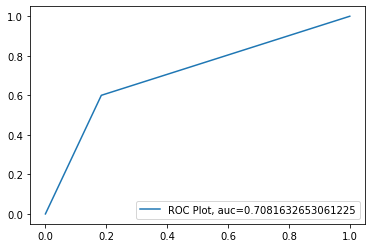

In [ ]:
#model = XGBClassifier()
model = SGDClassifier()
model.fit(X_train_pca, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_pca)
#y_pred_proba = model.predict_proba(X_test_rf)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
#print(accuracy)
print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_pca)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# calc ROC on new samples

### XGB FS + XGB

In [ ]:
df__ = df__.sample(frac = 1)

data_X = df__.iloc[:-500,0:len(df__.columns)-1] # stores the dataset except the last column because it the target variable
data_Y =  df__.iloc[:-500,len(df__.columns)-1] # target variable only

data_Vx =  df__.iloc[data_X.shape[0]:, 0: len(df__.columns)-1]
data_Vy = df__.iloc[data_Y.shape[0]:,len(df__.columns)-1]

over = SMOTE(sampling_strategy=0.4)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(data_X, data_Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size = 0.20 ,random_state=42)
#X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=42)

In [ ]:
xgb = SelectFromModel(XGBClassifier(n_estimators = 1000), threshold=0.002 )
xgb.fit(X_train, Y_train)
selected_feat= len(X_train.columns[(xgb.get_support())])
print(selected_feat)
col_names = X_train.columns[(xgb.get_support())]
print(col_names)
#n_comp_rf.append(selected_feat)
X_train_xgb = xgb.transform(X_train)
X_test_xgb = xgb.transform(X_test)
X_xgb = xgb.transform(data_Vx)
#X_test_rf = rf.transform(X_test)
#X_train_rf_list.append(X_train_rf)
#X_test_rf_list.append(X_test_rf) 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:13:25] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
46
Index(['intubation_to_extubation', 'BMI', 'Active_tobacco_use',
       'f_history_cad', 'diabetes', 'Dyslipidemia', 'last_cretenine_preop',
       'hypertension', 'BPsystolic', 'previous_cv_interventions', 'PCI_timing',
       'MI_timing', 'congestive_heart_failure_A', 'Angina_class',
       'beta_blockers_A', 'ace_inhibitors_A', 'nitratesIV', 'anti_coagulants',
       'inotropes', 'aspirin_A', 'lipid_lowering_A', 'Coronaries_diseased',
       'left_main_disease', 'Aortic_regurgitation', 'IABP', 'IABP_indication',
       'fresh_frozen_plasma_units_A', 'platelet_units_A',
       'Total_bypasses_grafted', 'no_of_ima_distal', 'DirectVision',
       'noda_venous_conduits', 'initial_hours_ventilated',
  

D:\Anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\Anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\Anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:13:31] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


ROC on Testing Dataset is: 0.9940028597558321
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       757
           1       0.98      1.00      0.99       364

    accuracy                           0.99      1121
   macro avg       0.99      0.99      0.99      1121
weighted avg       0.99      0.99      0.99      1121



ROC on Validation Dataset is: 0.9948559670781892
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       486
           1       0.74      1.00      0.85        14

    accuracy                           0.99       500
   macro avg       0.87      0.99      0.92       500
weighted avg 

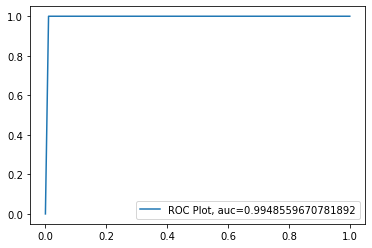

In [ ]:
model = XGBClassifier()
model.fit(X_train_xgb, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_xgb)
y_pred_proba = model.predict_proba(X_test_xgb)
predictions = [round(value) for value in y_pred]
# evaluate predictions

print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_xgb)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### XGB FS + RF



ROC on Testing Dataset is: 0.9926818557928201
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       757
           1       0.98      1.00      0.99       364

    accuracy                           0.99      1121
   macro avg       0.99      0.99      0.99      1121
weighted avg       0.99      0.99      0.99      1121



ROC on Validation Dataset is: 0.9958847736625515
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       486
           1       0.78      1.00      0.88        14

    accuracy                           0.99       500
   macro avg       0.89      1.00      0.94       500
weighted avg       0.99      0.99      0.99       500



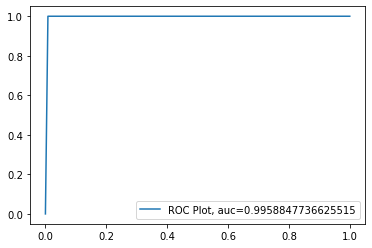

In [ ]:
model = RandomForestClassifier()
model.fit(X_train_xgb, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_xgb)
y_pred_proba = model.predict_proba(X_test_xgb)
predictions = [round(value) for value in y_pred]
# evaluate predictions

print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_xgb)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### XGB FS + LR



ROC on Testing Dataset is: 0.9728432069911596
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       757
           1       0.97      0.96      0.96       364

    accuracy                           0.98      1121
   macro avg       0.97      0.97      0.97      1121
weighted avg       0.98      0.98      0.98      1121



ROC on Validation Dataset is: 0.8846266901822457
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       486
           1       0.58      0.79      0.67        14

    accuracy                           0.98       500
   macro avg       0.79      0.88      0.83       500
weighted avg       0.98      0.98      0.98       500



D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


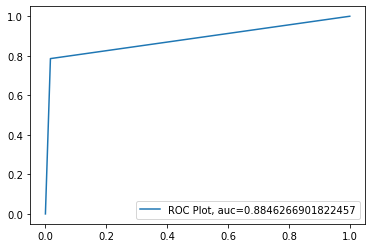

In [ ]:
model = LogisticRegression(max_iter = 1100)
model.fit(X_train_xgb, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_xgb)
y_pred_proba = model.predict_proba(X_test_xgb)
predictions = [round(value) for value in y_pred]
# evaluate predictions

print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_xgb)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### XGB FS + SVM



ROC on Testing Dataset is: 0.9150456544776228
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       757
           1       0.97      0.84      0.90       364

    accuracy                           0.94      1121
   macro avg       0.95      0.92      0.93      1121
weighted avg       0.94      0.94      0.94      1121



ROC on Validation Dataset is: 0.8162845385067606
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       486
           1       0.64      0.64      0.64        14

    accuracy                           0.98       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.98      0.98      0.98       500



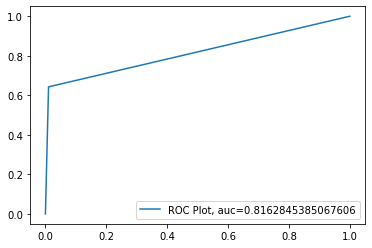

In [ ]:
#model = XGBClassifier()
model = SGDClassifier()
model.fit(X_train_xgb, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_xgb)
#y_pred_proba = model.predict_proba(X_test_rf)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
#print(accuracy)
print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_xgb)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# calc ROC on new samples

## No sampling (Pre and intra op)

### RF FS + XGB

In [ ]:
df__ = df__.sample(frac = 1)

data_X = df__.iloc[:-500,0:len(df__.columns)-1] # stores the dataset except the last column because it the target variable
data_Y =  df__.iloc[:-500,len(df__.columns)-1] # target variable only

data_Vx =  df__.iloc[data_X.shape[0]:, 0: len(df__.columns)-1]
data_Vy = df__.iloc[data_Y.shape[0]:,len(df__.columns)-1]

#over = SMOTE(sampling_strategy=0.4)
#under = RandomUnderSampler(sampling_strategy=0.5)
#steps = [('o', over), ('u', under)]
#pipeline = Pipeline(steps=steps)
# transform the dataset
#X, y = pipeline.fit_resample(data_X, data_Y)

X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=42)
#X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=42)

In [ ]:
rf = SelectFromModel(RandomForestClassifier(n_estimators = 1000), threshold=0.009 )
rf.fit(X_train, Y_train)
selected_feat= len(X_train.columns[(rf.get_support())])
print(selected_feat)
col_names = X_train.columns[(rf.get_support())]
print(col_names)
#n_comp_rf.append(selected_feat)
X_train_rf = rf.transform(X_train)
X_test_rf = rf.transform(X_test)
data_Vx_rf = rf.transform(data_Vx)
#X_test_rf = rf.transform(X_test)
#X_train_rf_list.append(X_train_rf)
#X_test_rf_list.append(X_test_rf) 

27
Index(['intubation_to_extubation', 'patient_age', 'Admission_to_surgery',
       'BMI', 'last_hematocrit', 'last_cretenine_preop', 'BPsystolic',
       'cardiogenic_shock', 'inotropes', 'ejection_fraction',
       'perfusion_time_min', 'cross_clamp_time_min', 'IABP', 'IABP_indication',
       'initial_hours_ventilated', 'initial_icu_stay', 'additional_icu_hours',
       'red_blood_cell_units', 'reintubated_hospital_stay',
       'drainage_at_12_hours', 'drainage_at_24_hours', 'post_op_creatinine',
       'prolonged_ventilation', 'Miscellaneous_complications',
       'cardiac_arrest', 'ventricular_arrythmia', 'dialysis_newly_required'],
      dtype='object')


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:15:45] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


ROC on Testing Dataset is: 0.9497213779128673
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       940
           1       0.79      0.90      0.84        21

    accuracy                           0.99       961
   macro avg       0.89      0.95      0.92       961
weighted avg       0.99      0.99      0.99       961



ROC on Validation Dataset is: 0.8416838842975207
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       484
           1       0.85      0.69      0.76        16

    accuracy                           0.99       500
   macro avg       0.92      0.84      0.88       500
weighted avg 

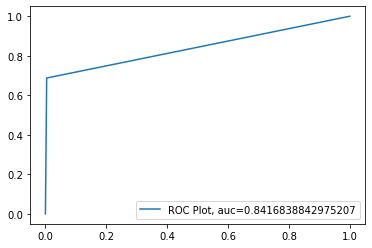

In [ ]:
#model = XGBClassifier()
model = XGBClassifier()
model.fit(X_train_rf, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_rf)
#y_pred_proba = model.predict_proba(X_test_rf)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
#print(accuracy)
print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(data_Vx_rf)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# calc ROC on new samples


### RF FS + RF



ROC on Testing Dataset is: 0.9259118541033434
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       940
           1       0.78      0.86      0.82        21

    accuracy                           0.99       961
   macro avg       0.89      0.93      0.91       961
weighted avg       0.99      0.99      0.99       961



ROC on Validation Dataset is: 0.8729338842975206
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       484
           1       0.86      0.75      0.80        16

    accuracy                           0.99       500
   macro avg       0.92      0.87      0.90       500
weighted avg       0.99      0.99      0.99       500



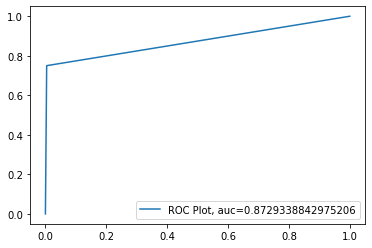

In [ ]:
#model = XGBClassifier()
model = RandomForestClassifier()
model.fit(X_train_rf, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_rf)
#y_pred_proba = model.predict_proba(X_test_rf)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
#print(accuracy)
print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(data_Vx_rf)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# calc ROC on new samples


### RF FS + LR



ROC on Testing Dataset is: 0.8544832826747721
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       940
           1       0.75      0.71      0.73        21

    accuracy                           0.99       961
   macro avg       0.87      0.85      0.86       961
weighted avg       0.99      0.99      0.99       961



ROC on Validation Dataset is: 0.778150826446281
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       484
           1       0.75      0.56      0.64        16

    accuracy                           0.98       500
   macro avg       0.87      0.78      0.82       500
weighted avg       0.98      0.98      0.98       500



D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


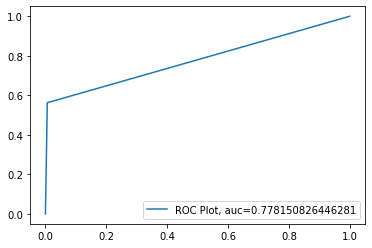

In [ ]:
#model = XGBClassifier()
model = LogisticRegression()
model.fit(X_train_rf, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_rf)
#y_pred_proba = model.predict_proba(X_test_rf)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
#print(accuracy)
print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(data_Vx_rf)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# calc ROC on new samples


##### RF FS + SVM



ROC on Testing Dataset is: 0.5
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       940
           1       0.00      0.00      0.00        21

    accuracy                           0.98       961
   macro avg       0.49      0.50      0.49       961
weighted avg       0.96      0.98      0.97       961



ROC on Validation Dataset is: 0.5
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       484
           1       0.00      0.00      0.00        16

    accuracy                           0.97       500
   macro avg       0.48      0.50      0.49       500
weighted avg       0.94      0.97      0.95       500



D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning:

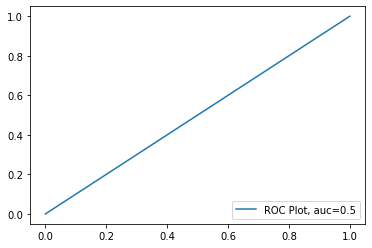

In [ ]:
#model = XGBClassifier()
model = SGDClassifier()
model.fit(X_train_rf, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_rf)
#y_pred_proba = model.predict_proba(X_test_rf)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
#print(accuracy)
print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(data_Vx_rf)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# calc ROC on new samples


### Lasso FS + XGB

In [ ]:
df__ = df__.sample(frac = 1)

data_X = df__.iloc[:-500,0:len(df__.columns)-1] # stores the dataset except the last column because it the target variable
data_Y =  df__.iloc[:-500,len(df__.columns)-1] # target variable only

data_Vx =  df__.iloc[data_X.shape[0]:, 0: len(df__.columns)-1]
data_Vy = df__.iloc[data_Y.shape[0]:,len(df__.columns)-1]

#over = SMOTE(sampling_strategy=0.4)
#under = RandomUnderSampler(sampling_strategy=0.5)
#steps = [('o', over), ('u', under)]
#pipeline = Pipeline(steps=steps)
# transform the dataset
#X, y = pipeline.fit_resample(data_X, data_Y)

X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=43)
#X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=42)

(array([485.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  15.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

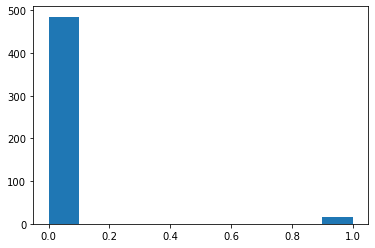

In [ ]:
plt.hist(data_Vy)

In [ ]:
lasso = SelectFromModel(LogisticRegression(C= 0.009, penalty='l1', solver = 'saga', max_iter=100000))
lasso.fit(X_train, Y_train)
rm_features = len(X_train.columns[(lasso.estimator_.coef_ == 0).ravel().tolist()])   
#n_comp_lasso.append(len(X_train.columns)-rm_features)
X_train_lasso = lasso.transform(X_train)
X_test_lasso = lasso.transform(X_test)
#X_train_lasso_list.append(X_train_lasso)
#X_test_lasso_list.append(X_test_lasso)
X_lasso = lasso.transform(data_Vx)
#X_test_lasso = lasso.transform(X_test)


In [ ]:
X_lasso.shape

(500, 8)

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:29:51] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


ROC on Testing Dataset is: 0.7031683717979221
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       934
           1       0.92      0.41      0.56        27

    accuracy                           0.98       961
   macro avg       0.95      0.70      0.78       961
weighted avg       0.98      0.98      0.98       961



ROC on Validation Dataset is: 0.7646048109965635
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       485
           1       0.80      0.53      0.64        15

    accuracy                           0.98       500
   macro avg       0.89      0.76      0.82       500
weighted avg 

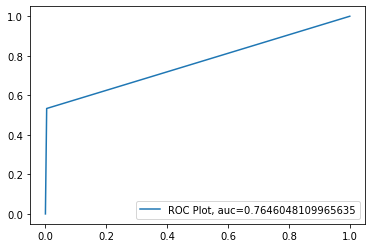

In [ ]:
#model = XGBClassifier()
model = XGBClassifier()
model.fit(X_train_lasso, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_lasso)
#y_pred_proba = model.predict_proba(X_test_rf)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
#print(accuracy)
print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_lasso)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# calc ROC on new samples

### Lasso FS + Rf



ROC on Testing Dataset is: 0.6851851851851851
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       934
           1       1.00      0.37      0.54        27

    accuracy                           0.98       961
   macro avg       0.99      0.69      0.77       961
weighted avg       0.98      0.98      0.98       961



ROC on Validation Dataset is: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       485
           1       1.00      0.33      0.50        15

    accuracy                           0.98       500
   macro avg       0.99      0.67      0.74       500
weighted avg       0.98      0.98      0.98       500



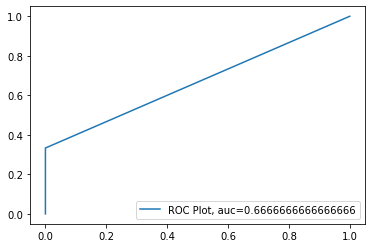

In [ ]:
#model = XGBClassifier()
model = RandomForestClassifier()
model.fit(X_train_lasso, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_lasso)
#y_pred_proba = model.predict_proba(X_test_rf)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
#print(accuracy)
print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_lasso)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# calc ROC on new samples

### Lasso FS + LR



ROC on Testing Dataset is: 0.6465421524308034
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       934
           1       0.73      0.30      0.42        27

    accuracy                           0.98       961
   macro avg       0.85      0.65      0.70       961
weighted avg       0.97      0.98      0.97       961



ROC on Validation Dataset is: 0.5625429553264605
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       485
           1       0.33      0.13      0.19        15

    accuracy                           0.97       500
   macro avg       0.65      0.56      0.59       500
weighted avg       0.95      0.97      0.96       500



D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


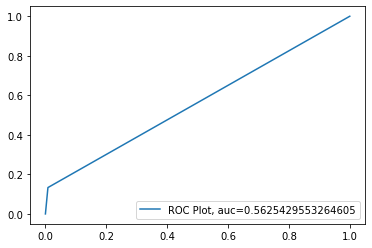

In [ ]:
#model = XGBClassifier()
model = LogisticRegression()
model.fit(X_train_lasso, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_lasso)
#y_pred_proba = model.predict_proba(X_test_rf)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
#print(accuracy)
print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_lasso)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# calc ROC on new samples

### Lasso FS + SVM



ROC on Testing Dataset is: 0.5495782151842533
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       932
           1       0.43      0.10      0.17        29

    accuracy                           0.97       961
   macro avg       0.70      0.55      0.58       961
weighted avg       0.96      0.97      0.96       961



ROC on Validation Dataset is: 0.6229338842975206
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       484
           1       0.67      0.25      0.36        16

    accuracy                           0.97       500
   macro avg       0.82      0.62      0.67       500
weighted avg       0.97      0.97      0.97       500



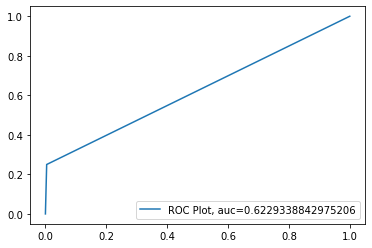

In [ ]:
#model = XGBClassifier()
model = SGDClassifier()
model.fit(X_train_lasso, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_lasso)
#y_pred_proba = model.predict_proba(X_test_rf)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
#print(accuracy)
print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_lasso)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# calc ROC on new samples

### Ridge FS + XGB

In [ ]:
df__ = df__.sample(frac = 1)

data_X = df__.iloc[:-500,0:len(df__.columns)-1] # stores the dataset except the last column because it the target variable
data_Y =  df__.iloc[:-500,len(df__.columns)-1] # target variable only

data_Vx =  df__.iloc[data_X.shape[0]:, 0: len(df__.columns)-1]
data_Vy = df__.iloc[data_Y.shape[0]:,len(df__.columns)-1]

#over = SMOTE(sampling_strategy=0.4)
#under = RandomUnderSampler(sampling_strategy=0.5)
#steps = [('o', over), ('u', under)]
#pipeline = Pipeline(steps=steps)
# transform the dataset
#X, y = pipeline.fit_resample(data_X, data_Y)

X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=42)
#X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=42)

In [ ]:
l2 = SelectFromModel(LogisticRegression(C= 0.0009, penalty='l2', solver = 'saga', max_iter=100000))
l2.fit(X_train, Y_train)
rm_features = len(X_train.columns[(lasso.estimator_.coef_ == 0).ravel().tolist()])   
#n_comp_lasso.append(len(X_train.columns)-rm_features)
X_train_l2 = l2.transform(X_train)
X_test_l2 = l2.transform(X_test)
#X_train_lasso_list.append(X_train_lasso)
#X_test_lasso_list.append(X_test_lasso)
X_l2 = l2.transform(data_Vx)
#X_test_lasso = lasso.transform(X_test)

In [ ]:
X_l2.shape

(500, 34)

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:32:50] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


ROC on Testing Dataset is: 0.9483888292158968
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       931
           1       0.90      0.90      0.90        30

    accuracy                           0.99       961
   macro avg       0.95      0.95      0.95       961
weighted avg       0.99      0.99      0.99       961



ROC on Validation Dataset is: 0.8035855315116095
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       487
           1       0.67      0.62      0.64        13

    accuracy                           0.98       500
   macro avg       0.83      0.80      0.82       500
weighted avg 

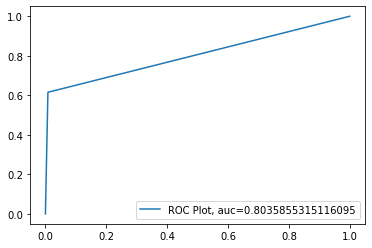

In [ ]:
#model = XGBClassifier()
model = XGBClassifier()
model.fit(X_train_l2, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_l2)
#y_pred_proba = model.predict_proba(X_test_rf)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
#print(accuracy)
print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_l2)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# calc ROC on new samples

### Ridge FS + RF



ROC on Testing Dataset is: 0.847314715359828
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       931
           1       0.81      0.70      0.75        30

    accuracy                           0.99       961
   macro avg       0.90      0.85      0.87       961
weighted avg       0.98      0.99      0.98       961



ROC on Validation Dataset is: 0.8056389196019587
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       487
           1       0.80      0.62      0.70        13

    accuracy                           0.99       500
   macro avg       0.89      0.81      0.84       500
weighted avg       0.98      0.99      0.99       500



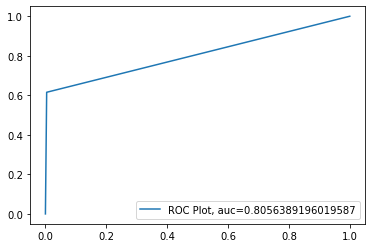

In [ ]:
#model = XGBClassifier()
model = RandomForestClassifier()
model.fit(X_train_l2, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_l2)
#y_pred_proba = model.predict_proba(X_test_rf)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
#print(accuracy)
print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_l2)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# calc ROC on new samples

### Ridge FS + LR



ROC on Testing Dataset is: 0.8306480486931614
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       931
           1       0.80      0.67      0.73        30

    accuracy                           0.98       961
   macro avg       0.89      0.83      0.86       961
weighted avg       0.98      0.98      0.98       961



ROC on Validation Dataset is: 0.7276891486337072
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       487
           1       0.67      0.46      0.55        13

    accuracy                           0.98       500
   macro avg       0.83      0.73      0.77       500
weighted avg       0.98      0.98      0.98       500



D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


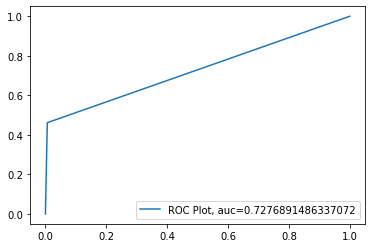

In [ ]:
#model = XGBClassifier()
model = LogisticRegression()
model.fit(X_train_l2, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_l2)
#y_pred_proba = model.predict_proba(X_test_rf)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
#print(accuracy)
print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_l2)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# calc ROC on new samples

### Ridge FS + SVM



ROC on Testing Dataset is: 0.6483888292158969
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       931
           1       0.75      0.30      0.43        30

    accuracy                           0.98       961
   macro avg       0.86      0.65      0.71       961
weighted avg       0.97      0.98      0.97       961



ROC on Validation Dataset is: 0.5748696888327278
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       487
           1       0.50      0.15      0.24        13

    accuracy                           0.97       500
   macro avg       0.74      0.57      0.61       500
weighted avg       0.97      0.97      0.97       500



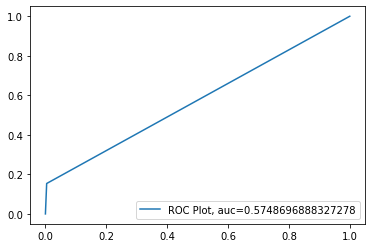

In [ ]:
#model = XGBClassifier()
model = SGDClassifier()
model.fit(X_train_l2, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_l2)
#y_pred_proba = model.predict_proba(X_test_rf)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
#print(accuracy)
print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_l2)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# calc ROC on new samples

### PCA FS + XGB

In [ ]:
df__ = df__.sample(frac = 1)

data_X = df__.iloc[:-500,0:len(df__.columns)-1] # stores the dataset except the last column because it the target variable
data_Y =  df__.iloc[:-500,len(df__.columns)-1] # target variable only

data_Vx =  df__.iloc[data_X.shape[0]:, 0: len(df__.columns)-1]
data_Vy = df__.iloc[data_Y.shape[0]:,len(df__.columns)-1]

#oversample = SMOTE()
#X, y = oversample.fit_resample(data_X, data_Y)

X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=42)
#X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=42)

In [ ]:
pca = PCA(0.98 ,svd_solver='full') # pca method
pca.fit(X_train) # fit on training sample
#print()
X_train_pca = pca.transform(X_train) # transform training set
X_test_pca = pca.transform(X_test) # transform testing set
X_pca = pca.transform(data_Vx)
#X_train_pca_list.append(X_train_pca) # append the transformed training set to a list
#X_test_pca_list.append(X_test_pca) # append transformed testing set to a list
print(pca.n_components_)
print(pca.explained_variance_ratio_)

20
[0.60764822 0.17927758 0.05420143 0.04497067 0.02258266 0.01156104
 0.00953433 0.00842908 0.00637672 0.00578031 0.00467683 0.00399172
 0.00384642 0.00367883 0.00362547 0.00341097 0.00201442 0.00194557
 0.00160027 0.00152324]


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:55:17] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


ROC on Testing Dataset is: 0.6473764716788728
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       938
           1       0.44      0.30      0.36        23

    accuracy                           0.97       961
   macro avg       0.71      0.65      0.67       961
weighted avg       0.97      0.97      0.97       961



ROC on Validation Dataset is: 0.6030276308054086
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       486
           1       0.43      0.21      0.29        14

    accuracy                           0.97       500
   macro avg       0.70      0.60      0.64       500
weighted avg 

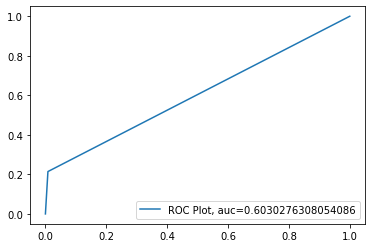

In [ ]:
model = XGBClassifier()
model.fit(X_train_pca, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_pca)
y_pred_proba = model.predict_proba(X_test_pca)
predictions = [round(value) for value in y_pred]
# evaluate predictions

print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_pca)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### PCA FS + RF



ROC on Testing Dataset is: 0.5392138685454714
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       938
           1       0.20      0.09      0.12        23

    accuracy                           0.97       961
   macro avg       0.59      0.54      0.55       961
weighted avg       0.96      0.97      0.96       961



ROC on Validation Dataset is: 0.5693709582598471
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       486
           1       0.50      0.14      0.22        14

    accuracy                           0.97       500
   macro avg       0.74      0.57      0.60       500
weighted avg       0.96      0.97      0.96       500



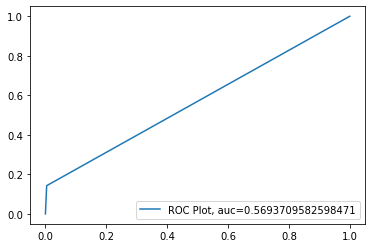

In [ ]:
model = RandomForestClassifier()
model.fit(X_train_pca, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_pca)
y_pred_proba = model.predict_proba(X_test_pca)
predictions = [round(value) for value in y_pred]
# evaluate predictions

print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_pca)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### PCA FS + LR



ROC on Testing Dataset is: 0.6712477982757022
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       938
           1       0.62      0.35      0.44        23

    accuracy                           0.98       961
   macro avg       0.80      0.67      0.72       961
weighted avg       0.98      0.98      0.98       961



ROC on Validation Dataset is: 0.6050852439741328
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       486
           1       0.60      0.21      0.32        14

    accuracy                           0.97       500
   macro avg       0.79      0.61      0.65       500
weighted avg       0.97      0.97      0.97       500



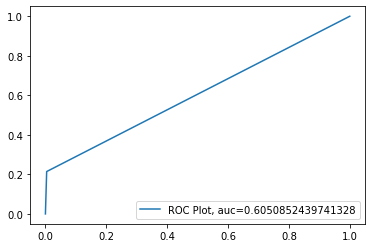

In [ ]:
model = LogisticRegression(max_iter = 1100)
model.fit(X_train_pca, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_pca)
y_pred_proba = model.predict_proba(X_test_pca)
predictions = [round(value) for value in y_pred]
# evaluate predictions

print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_pca)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### PCA FS + SVM



ROC on Testing Dataset is: 0.6701817001946788
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       938
           1       0.53      0.35      0.42        23

    accuracy                           0.98       961
   macro avg       0.76      0.67      0.70       961
weighted avg       0.97      0.98      0.97       961



ROC on Validation Dataset is: 0.6387419165196943
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       486
           1       0.50      0.29      0.36        14

    accuracy                           0.97       500
   macro avg       0.74      0.64      0.67       500
weighted avg       0.97      0.97      0.97       500



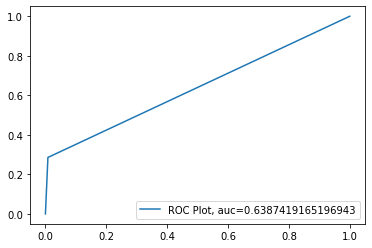

In [ ]:
#model = XGBClassifier()
model = SGDClassifier()
model.fit(X_train_pca, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_pca)
#y_pred_proba = model.predict_proba(X_test_rf)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
#print(accuracy)
print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_pca)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# calc ROC on new samples

### XGB FS + XGB

In [ ]:
df__ = df__.sample(frac = 1)

data_X = df__.iloc[:-500,0:len(df__.columns)-1] # stores the dataset except the last column because it the target variable
data_Y =  df__.iloc[:-500,len(df__.columns)-1] # target variable only

data_Vx =  df__.iloc[data_X.shape[0]:, 0: len(df__.columns)-1]
data_Vy = df__.iloc[data_Y.shape[0]:,len(df__.columns)-1]

#over = SMOTE(sampling_strategy=0.4)
#under = RandomUnderSampler(sampling_strategy=0.5)
#steps = [('o', over), ('u', under)]
#pipeline = Pipeline(steps=steps)
# transform the dataset
#X, y = pipeline.fit_resample(data_X, data_Y)

X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=42)
#X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=42)

In [ ]:
xgb = SelectFromModel(XGBClassifier(n_estimators = 1000), threshold=0.002 )
xgb.fit(X_train, Y_train)
selected_feat= len(X_train.columns[(xgb.get_support())])
print(selected_feat)
col_names = X_train.columns[(xgb.get_support())]
print(col_names)
#n_comp_rf.append(selected_feat)
X_train_xgb = xgb.transform(X_train)
X_test_xgb = xgb.transform(X_test)
X_xgb = xgb.transform(data_Vx)
#X_test_rf = rf.transform(X_test)
#X_train_rf_list.append(X_train_rf)
#X_test_rf_list.append(X_test_rf) 

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:05:10] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
49
Index(['intubation_to_extubation', 'patient_age', 'Admission_to_surgery',
       'BMI', 'Active_tobacco_use', 'f_history_cad', 'diabetes',
       'last_hematocrit', 'Dyslipidemia', 'BPsystolic', 'MI_timing',
       'NYHA_class', 'Cardiac_Presentation_on_Admission', 'Angina_class',
       'cardiogenic_shock', 'resuscitation', 'arrhythmia', 'ventilator_used',
       'beta_blockers_A', 'ace_inhibitors_A', 'nitratesIV', 'anti_coagulants',
       'aspirin_A', 'lipid_lowering_A', 'Statin_A', 'ejection_fraction',
       'Mitral_regurgitation', 'CABG_status', 'perfusion_time_min', 'IABP',
       'IABP_indication', 'Total_bypasses_grafted', 'no_of_ima_distal',
       'initial_hours_ventilated', 'initial_icu_

D:\Anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\Anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\Anaconda\lib\site-packages\sklearn\base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
feat_2 = col_names.tolist()

In [ ]:
imp_2 = model.get_booster().get_score(importance_type= 'gain')

In [ ]:
imp_mat2 = pd.DataFrame(imp_2.items(), columns=['Features', 'Importance'])
imp_mat2 = imp_mat2.drop(['Features'], axis = 1)
imp_mat2['Features']= feat_2
imp_mat2
imp_mat2 = imp_mat2.sort_values(['Importance'], ascending = False)
imp_mat2
#imp_mat.to_csv('feat_imp_40.csv')

,Importance,Features
46,14.877722,cardiac_arrest
44,5.898263,prolonged_ventilation
45,5.634988,perioperative_mi
41,3.394200,hospital_complications
14,3.253906,cardiogenic_shock
19,2.556041,ace_inhibitors_A
38,2.463176,reintubated_hospital_stay
17,1.749112,ventilator_used
22,1.594278,aspirin_A
29,1.435511,IABP


In [ ]:
imp_mat2.to_csv('feat_imp_49.csv')

In [ ]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:05:25] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


ROC on Testing Dataset is: 0.8661381254404511
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       946
           1       0.92      0.73      0.81        15

    accuracy                           0.99       961
   macro avg       0.96      0.87      0.91       961
weighted avg       0.99      0.99      0.99       961



ROC on Validation Dataset is: 0.8989690721649485
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       485
           1       0.92      0.80      0.86        15

    accuracy                           0.99       500
   macro avg       0.96      0.90      0.93       500
weighted avg 

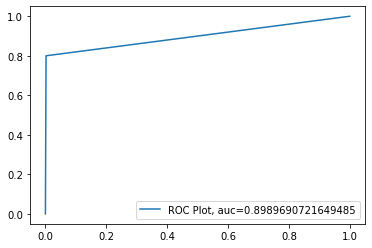

In [ ]:
model = XGBClassifier()
model.fit(X_train_xgb, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_xgb)
y_pred_proba = model.predict_proba(X_test_xgb)
predictions = [round(value) for value in y_pred]
# evaluate predictions

print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_xgb)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### XGB FS + RF



ROC on Testing Dataset is: 0.7667853314959423
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       933
           1       0.88      0.54      0.67        28

    accuracy                           0.98       961
   macro avg       0.93      0.77      0.83       961
weighted avg       0.98      0.98      0.98       961



ROC on Validation Dataset is: 0.8739837398373983
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       492
           1       0.86      0.75      0.80         8

    accuracy                           0.99       500
   macro avg       0.93      0.87      0.90       500
weighted avg       0.99      0.99      0.99       500



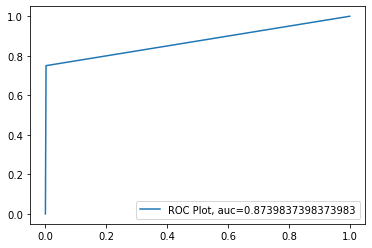

In [ ]:
model = RandomForestClassifier()
model.fit(X_train_xgb, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_xgb)
y_pred_proba = model.predict_proba(X_test_xgb)
predictions = [round(value) for value in y_pred]
# evaluate predictions

print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_xgb)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### XGB FS + LR



ROC on Testing Dataset is: 0.7489281886387996
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       933
           1       0.88      0.50      0.64        28

    accuracy                           0.98       961
   macro avg       0.93      0.75      0.81       961
weighted avg       0.98      0.98      0.98       961



ROC on Validation Dataset is: 0.75
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       492
           1       1.00      0.50      0.67         8

    accuracy                           0.99       500
   macro avg       1.00      0.75      0.83       500
weighted avg       0.99      0.99      0.99       500



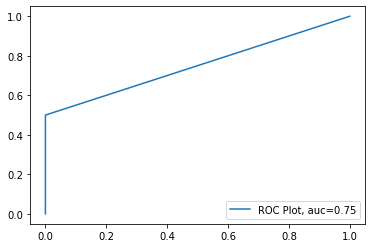

In [ ]:
model = LogisticRegression(max_iter = 11000)
model.fit(X_train_xgb, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_xgb)
y_pred_proba = model.predict_proba(X_test_xgb)
predictions = [round(value) for value in y_pred]
# evaluate predictions

print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_xgb)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### XGB FS + SVM



ROC on Testing Dataset is: 0.5535714285714286
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       933
           1       1.00      0.11      0.19        28

    accuracy                           0.97       961
   macro avg       0.99      0.55      0.59       961
weighted avg       0.97      0.97      0.96       961



ROC on Validation Dataset is: 0.625
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       492
           1       1.00      0.25      0.40         8

    accuracy                           0.99       500
   macro avg       0.99      0.62      0.70       500
weighted avg       0.99      0.99      0.98       500



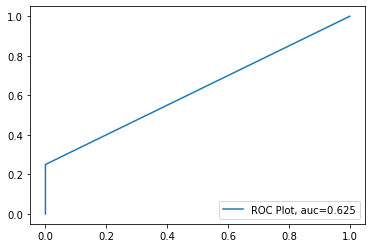

In [ ]:
#model = XGBClassifier()
model = SGDClassifier()
model.fit(X_train_xgb, Y_train)

# make predictions for test data
y_pred = model.predict(X_test_xgb)
#y_pred_proba = model.predict_proba(X_test_rf)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
#print(accuracy)
print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(X_xgb)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# calc ROC on new samples

In [ ]:
df___ = df__[["cardiac_arrest","prolonged_ventilation","perioperative_mi","hospital_complications","cardiogenic_shock","ace_inhibitors_A","reintubated_hospital_stay","ventilator_used","aspirin_A","IABP", "in_hospital_mortality"]]

In [ ]:
df___ = df___.sample(frac = 1)

data_X = df___.iloc[:-500,0:len(df___.columns)-1] # stores the dataset except the last column because it the target variable
data_Y =  df___.iloc[:-500,len(df___.columns)-1] # target variable only

data_Vx =  df___.iloc[data_X.shape[0]:, 0: len(df___.columns)-1]
data_Vy = df___.iloc[data_Y.shape[0]:,len(df___.columns)-1]

#over = SMOTE(sampling_strategy=0.4)
#under = RandomUnderSampler(sampling_strategy=0.5)
#steps = [('o', over), ('u', under)]
#pipeline = Pipeline(steps=steps)
# transform the dataset
#X, y = pipeline.fit_resample(data_X, data_Y)


oversample = SMOTE()
X, y = oversample.fit_resample(data_X, data_Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size = 0.20 ,random_state=42)
#X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_Y,test_size = 0.20 ,random_state=42)

In [ ]:
df___.shape

(5305, 11)

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:09:42] WARNING: D:\bld\xgboost-split_1634712635879\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


ROC on Testing Dataset is: 0.9823568514502421
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       934
           1       0.97      0.99      0.98       939

    accuracy                           0.98      1873
   macro avg       0.98      0.98      0.98      1873
weighted avg       0.98      0.98      0.98      1873



ROC on Validation Dataset is: 0.9499350860110354
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       474
           1       0.69      0.92      0.79        26

    accuracy                           0.97       500
   macro avg       0.84      0.95      0.89       500
weighted avg 

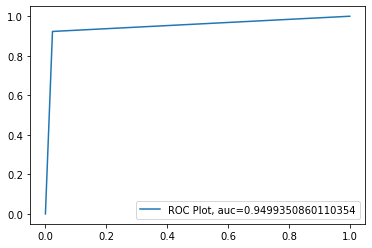

In [ ]:
#model = XGBClassifier()
model = XGBClassifier(learning_rate = 0.00003, n_estimators=3000, max_depth = 100)
model.fit(X_train, Y_train)

# make predictions for test data
y_pred = model.predict(X_test)
#y_pred_proba = model.predict_proba(X_test_rf)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(Y_test, predictions)
#print(accuracy)
print("\n\nROC on Testing Dataset is:",roc_auc_score(Y_test,predictions))
print(classification_report(Y_test,predictions))


y_pred_1 = model.predict(data_Vx)
fpr, tpr, _ = roc_curve(data_Vy,  y_pred_1)
auc = roc_auc_score(data_Vy, y_pred_1)
print("\n\nROC on Validation Dataset is:",auc)
print(classification_report(data_Vy,y_pred_1))

plt.plot(fpr,tpr,label="ROC Plot, auc="+str(auc))
plt.legend(loc=4)
plt.show()
# calc ROC on new samples